Proyecto Grupal Nº2 - Grupo 3

In [1]:
#Importar librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestCentroid
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn import datasets

from sklearn.model_selection import KFold

from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler 

from numpy import mean, std
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE 
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

import pickle

# GridSearchCV
from sklearn.model_selection import GridSearchCV


from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import GradientBoostingClassifier

# Normalizacion
from sklearn.preprocessing import MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV

# Train, Test
from sklearn.model_selection import train_test_split

# Metricas
from sklearn.metrics import jaccard_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import roc_curve
from sklearn.metrics import auc

Clasificación KNN y Nearest Centroid

In [2]:
#Cargar dataset

df_principal = pd.read_csv("machine failure.csv")

df_principal.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0

In [3]:
df_principal.shape

(10000, 14)

In [4]:
df_principal.describe()

UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]  Machine failure  \
count            10000.000000  10000.000000     10000.000000     10000.000000   
mean              1538.776100     39.986910       107.951000         0.033900   
std                179.284096      9.968934        63.654147         0.180981   
min               1168.000000      3.800000         0.000000         0.000000   
25%               1423.000000     33.200000        53.000000         0.000000   
50%               1503.000000     40.100000       108.000000         0.000000   
75%               1612.000000     46.800000       162.000000         0.000000   
max               2886.000000     76.600000       253.000000         1.000000   

                TWF           HDF           PWF           OSF          RNF  
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.00000  
mean       0.004600      0.011500      0.009500      0.009800      0.00190  
std        0.067671      0.106625      0.097009      0.098514      0.04355  
min        0.000000      0.000000      0.000000      0.000000      0.00000  
25%        0.000000      0.000000      0.000000      0.000000      0.00000  
50%        0.000000      0.000000      0.000000      0.000000      0.00000  
75%        0.000000      0.000000      0.000000      0.000000      0.00000  
max        1.000000      1.000000      1.000000      1.000000      1.00000

In [5]:
df_principal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [6]:
df_principal.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [7]:
df_principal.isna().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

Partición de DF

EDA

In [8]:
# Columna "UDI"
df_principal["UDI"].describe()

count    10000.00000
mean      5000.50000
std       2886.89568
min          1.00000
25%       2500.75000
50%       5000.50000
75%       7500.25000
max      10000.00000
Name: UDI, dtype: float64

In [9]:
# Número de elemento únicos igual al número de filas

df_principal["UDI"].unique().shape[0] == df_principal.shape[0]

# Podemos eliminar esta columna, lo haremos más adelante

True

In [10]:
# Columna "Product ID"
df_principal["Product ID"].describe()

count      10000
unique     10000
top       M14860
freq           1
Name: Product ID, dtype: object

In [11]:
# Número de elemento únicos igual al número de filas

df_principal["Product ID"].unique().shape[0] == df_principal.shape[0]

# Podemos eliminar esta columna, lo haremos más adelante

True

In [12]:
# Columna "Type"
df_principal["Type"].describe()

count     10000
unique        3
top           L
freq       6000
Name: Type, dtype: object

In [13]:
df_principal["Type"].value_counts()

Type
L    6000
M    2997
H    1003
Name: count, dtype: int64

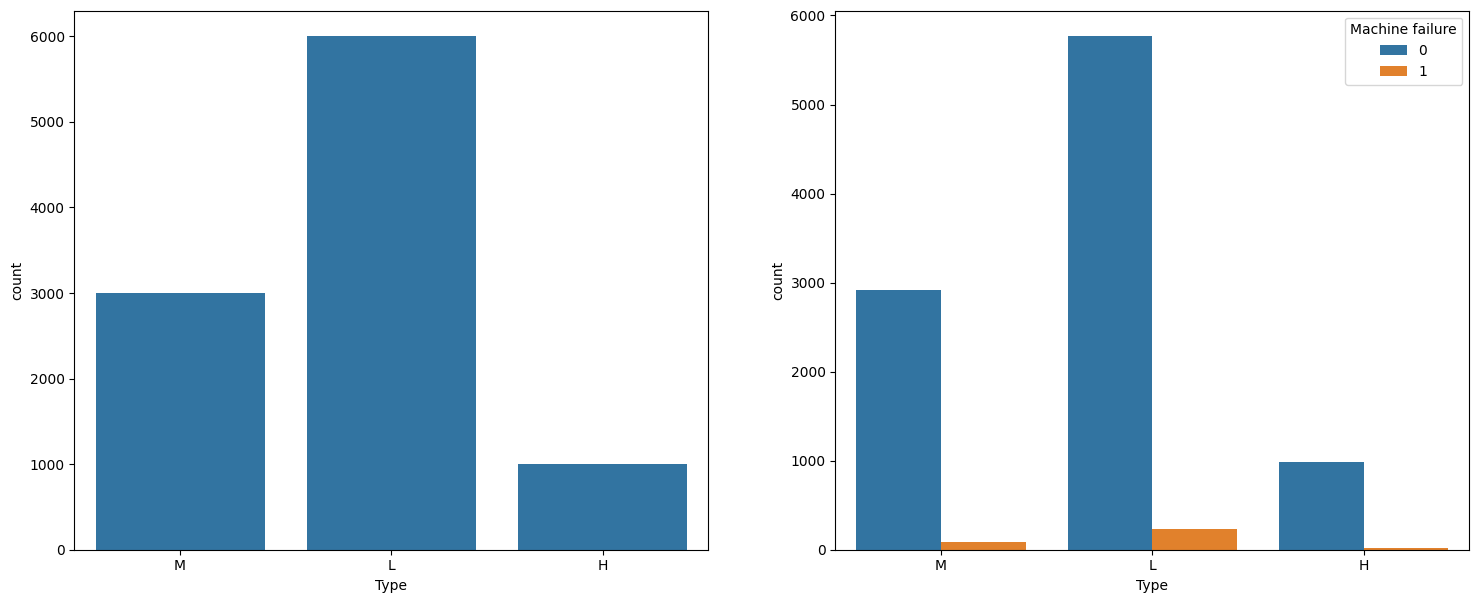

In [14]:
# Relación de la columna "Type" con la columna "Machine failure"

fig, axes = plt.subplots(1, 2, figsize = (18, 7))

sns.countplot(x = df_principal["Type"], ax = axes[0]);
sns.countplot(x = df_principal["Type"], hue = df_principal["Machine failure"],  ax = axes[1]);

plt.show()

In [15]:
# labelEncoder sobre la columna "Type" para transformarla a numerica

from sklearn.preprocessing import LabelEncoder

type_LabelEncoder = LabelEncoder()

type = type_LabelEncoder.fit_transform(df_principal["Type"]) 

df_principal["Type"] = type

df_principal

UDI Product ID  Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860     2                298.1                    308.6   
1         2     L47181     1                298.2                    308.7   
2         3     L47182     1                298.1                    308.5   
3         4     L47183     1                298.2                    308.6   
4         5     L47184     1                298.2                    308.7   
...     ...        ...   ...                  ...                      ...   
9995   9996     M24855     2                298.8                    308.4   
9996   9997     H39410     0                298.9                    308.4   
9997   9998     M24857     2                299.0                    308.6   
9998   9999     H39412     0                299.0                    308.7   
9999  10000     M24859     2                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
0                       1551         42.8                0                0   
1                       1408         46.3                3                0   
2                       1498         49.4                5                0   
3                       1433         39.5                7                0   
4                       1408         40.0                9                0   
...                      ...          ...              ...              ...   
9995                    1604         29.5               14                0   
9996                    1632         31.8               17                0   
9997                    1645         33.4               22                0   
9998                    1408         48.5               25                0   
9999                    1500         40.2               30                0   

      TWF  HDF  PWF  OSF  RNF  
0       0    0    0    0    0  
1       0    0    0    0    0  
2       0    0    0    0    0  
3       0    0    0    0    0  
4       0    0    0    0    0  
...   ...  ...  ...  ...  ...  
9995    0    0    0    0    0  
9996    0    0    0    0    0  
9997    0    0    0    0    0  
9998    0    0    0    0    0  
9999    0    0    0    0    0  

[10000 rows x 14 columns]

In [16]:
df_principal.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [17]:
#Column "Air temperature [k]"
df_principal["Air temperature [K]"].describe()

count    10000.000000
mean       300.004930
std          2.000259
min        295.300000
25%        298.300000
50%        300.100000
75%        301.500000
max        304.500000
Name: Air temperature [K], dtype: float64

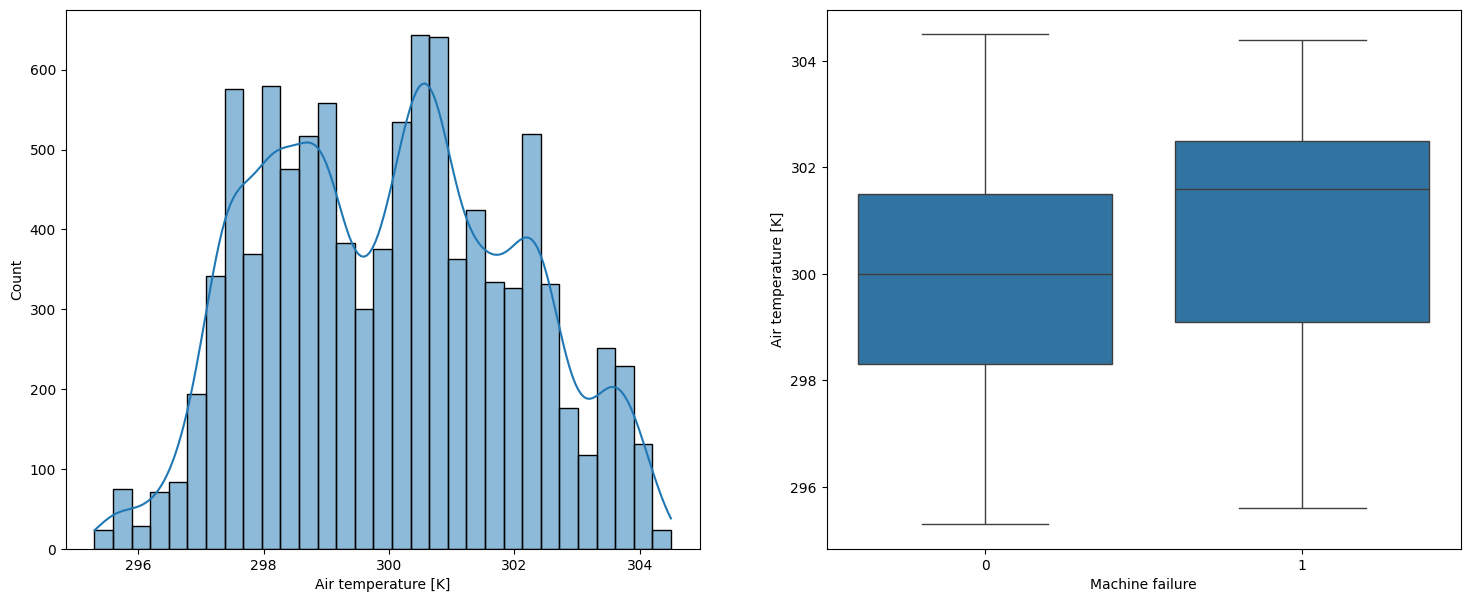

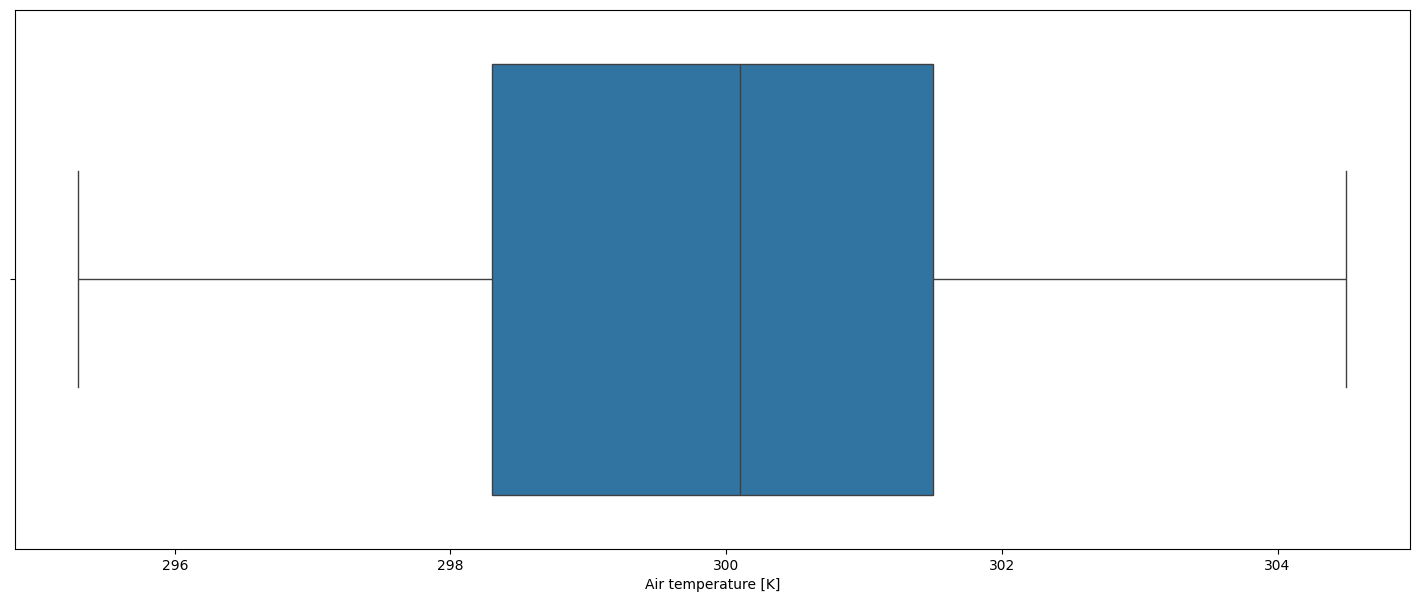

In [18]:
# Relación de la columna "Air temperature [K]" con "Machine failure"

fig, axes = plt.subplots(1, 2, figsize = (18, 7))

sns.histplot(x = df_principal["Air temperature [K]"], kde = True, ax = axes[0]);
sns.boxplot(x = df_principal["Machine failure"], y = df_principal["Air temperature [K]"], ax = axes[1]);
plt.show()


plt.figure(figsize = (18, 7))

sns.boxplot(x = df_principal["Air temperature [K]"]);
plt.show()

In [19]:
#Column "Process temperature [K]"
df_principal["Process temperature [K]"].describe()

count    10000.000000
mean       310.005560
std          1.483734
min        305.700000
25%        308.800000
50%        310.100000
75%        311.100000
max        313.800000
Name: Process temperature [K], dtype: float64

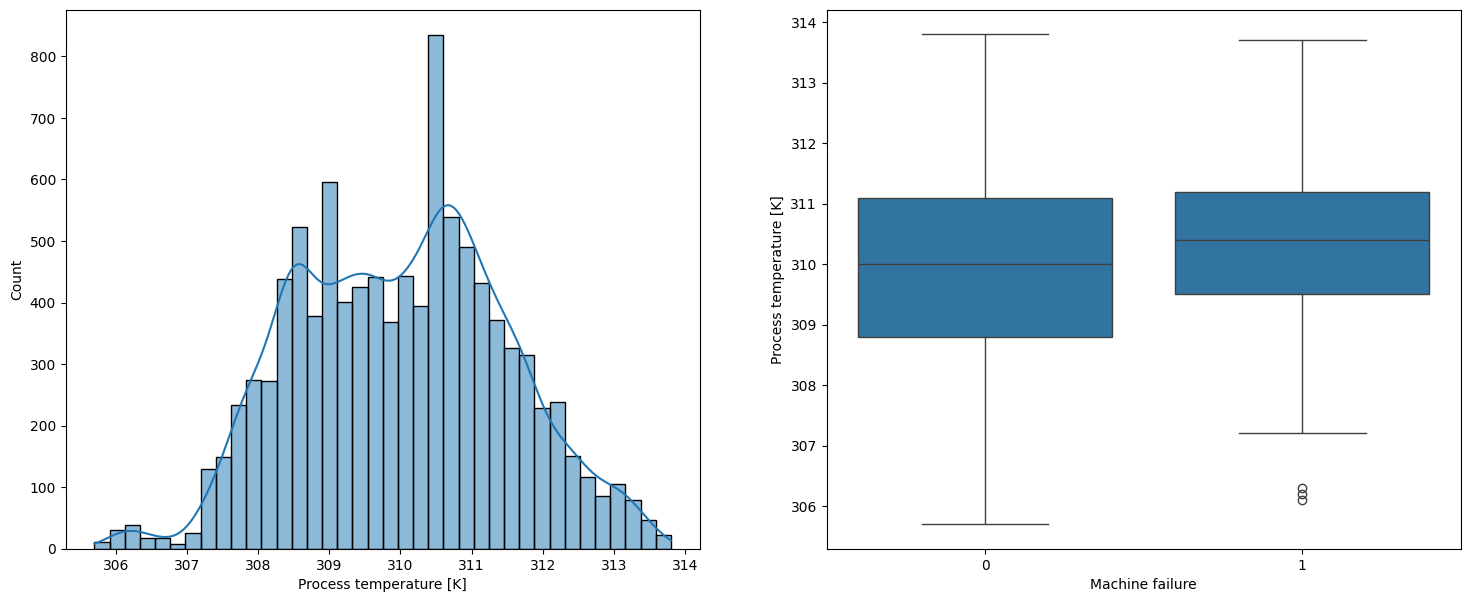

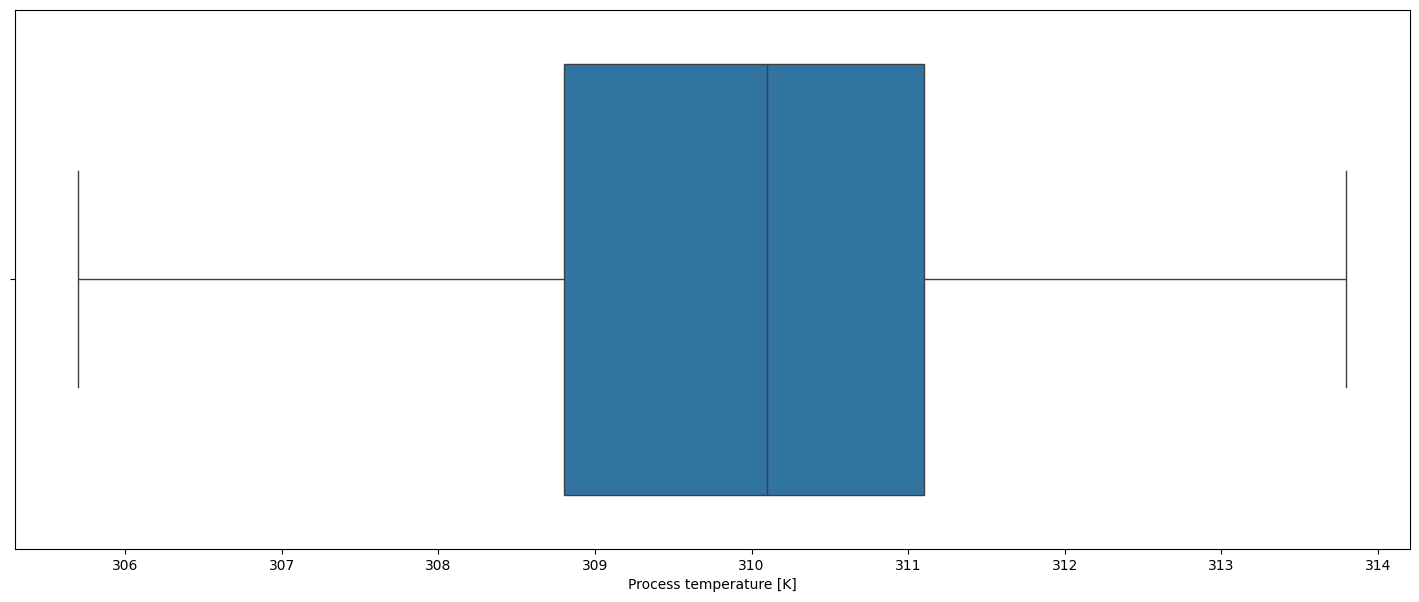

In [20]:
# Relación de la columna "Process temperature [K]" con "Machine failure"

fig, axes = plt.subplots(1, 2, figsize = (18, 7))

sns.histplot(x = df_principal["Process temperature [K]"], kde = True, ax = axes[0]);
sns.boxplot(x = df_principal["Machine failure"], y = df_principal["Process temperature [K]"], ax = axes[1]);
plt.show()


plt.figure(figsize = (18, 7))

sns.boxplot(x = df_principal["Process temperature [K]"]);
plt.show()

In [21]:
#Column "Rotational speed [rpm]"
df_principal["Rotational speed [rpm]"].describe()

count    10000.000000
mean      1538.776100
std        179.284096
min       1168.000000
25%       1423.000000
50%       1503.000000
75%       1612.000000
max       2886.000000
Name: Rotational speed [rpm], dtype: float64

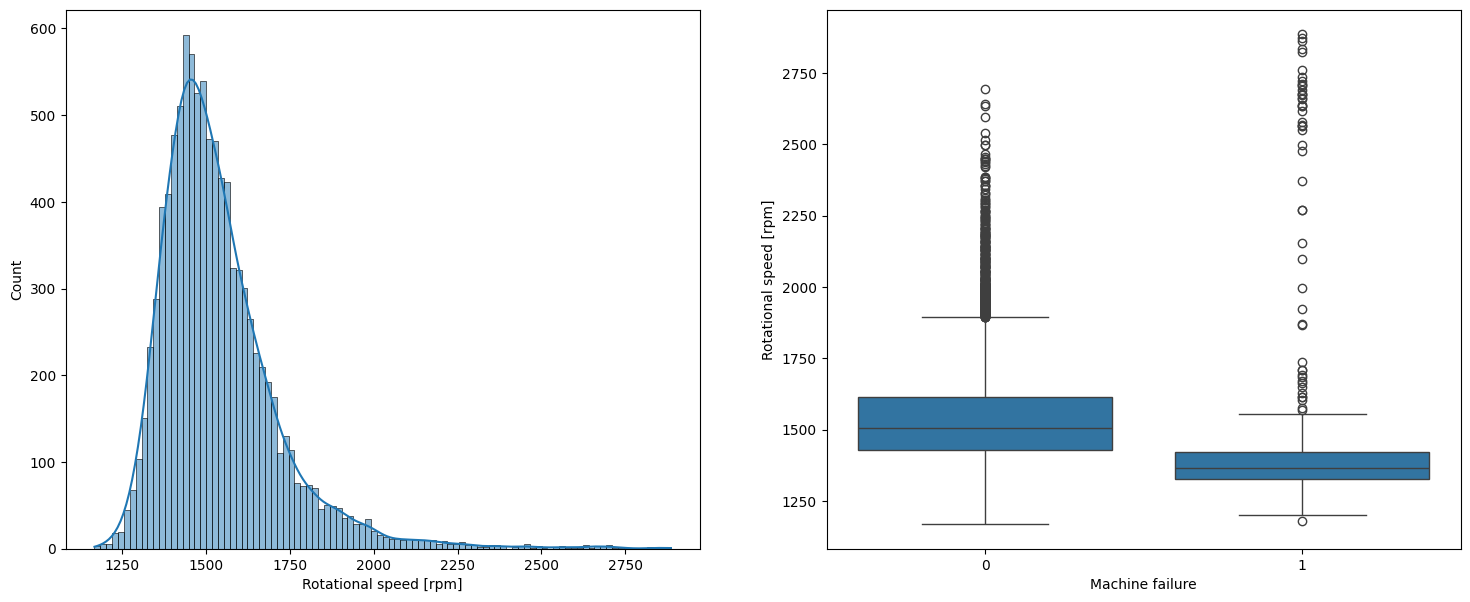

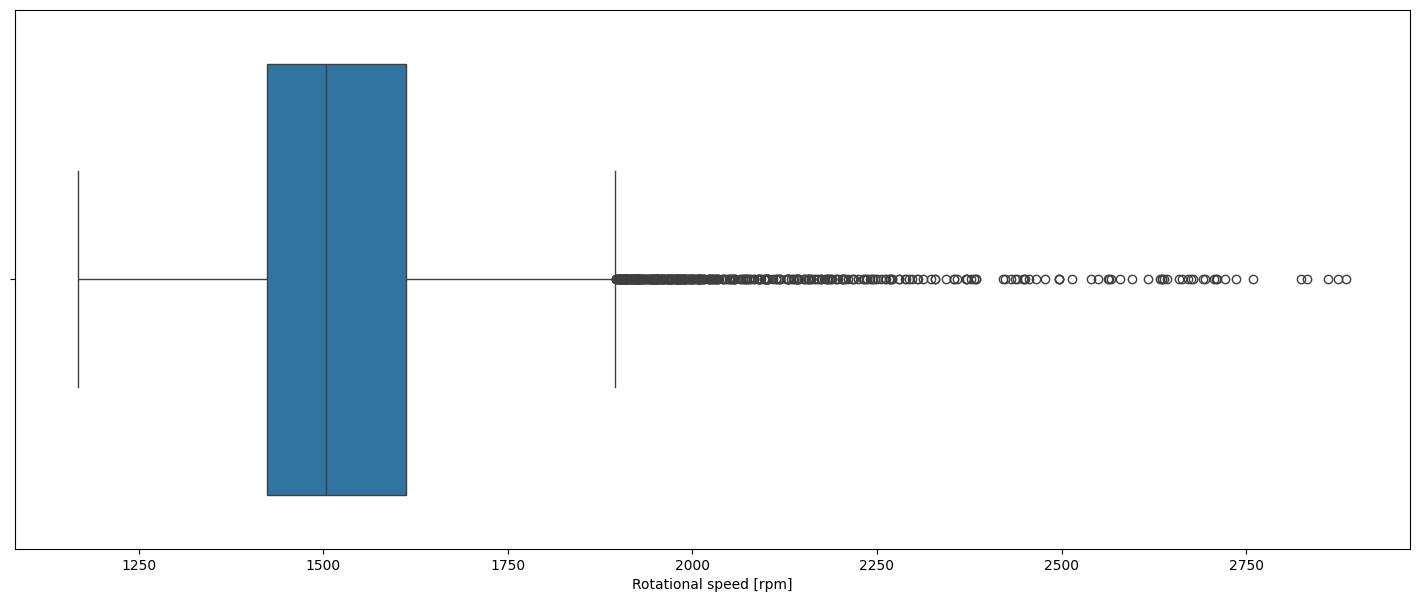

In [22]:
# Relación de la columna "Rotational speed [rpm]" con "Machine failure"

fig, axes = plt.subplots(1, 2, figsize = (18, 7))

sns.histplot(x = df_principal["Rotational speed [rpm]"], kde = True, ax = axes[0]);
sns.boxplot(x = df_principal["Machine failure"], y = df_principal["Rotational speed [rpm]"], ax = axes[1]);
plt.show()


plt.figure(figsize = (18, 7))

sns.boxplot(x = df_principal["Rotational speed [rpm]"]);
plt.show()

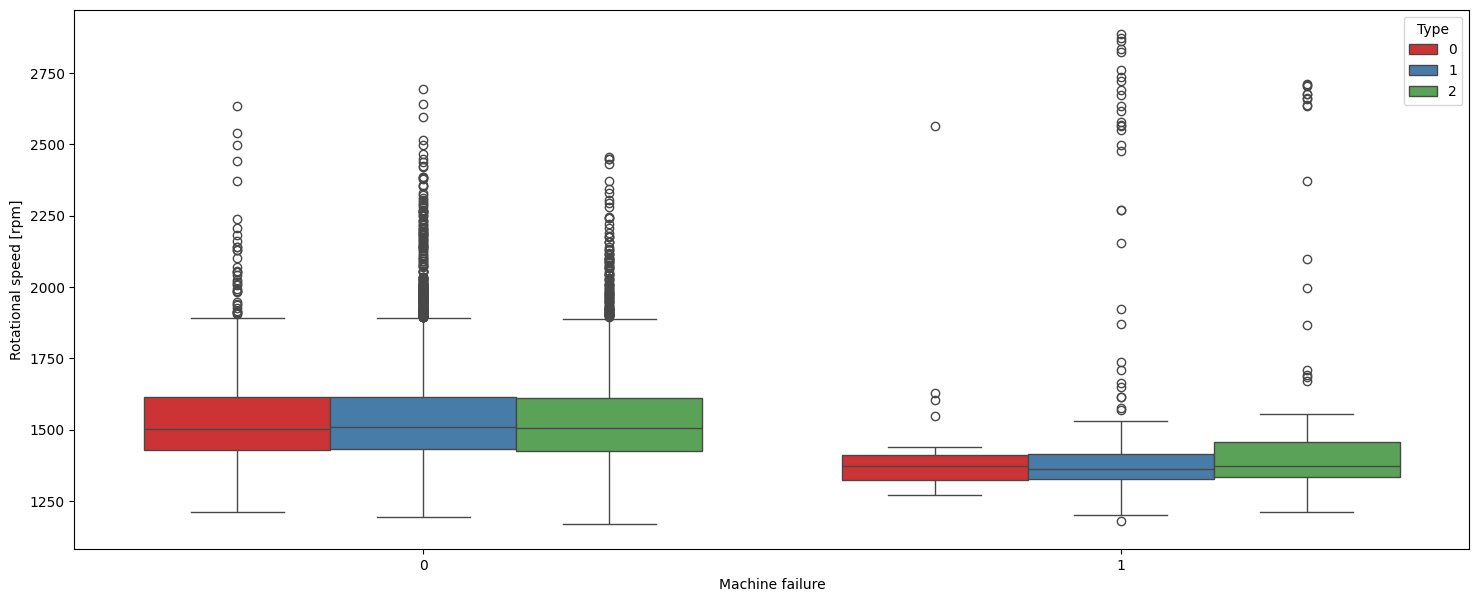

In [23]:
#Separando por "Type":

# Relación de la columna "Rotational speed [rpm]" con "Machine failure" para cada tipo de producto
plt.figure(figsize=(18, 7))
sns.boxplot(data=df_principal, x="Machine failure", y="Rotational speed [rpm]", hue="Type", palette='Set1')
plt.show()


In [24]:
#Como hay muchos outliers, probaremos hacer una transformación logarítmica

df_principal["Log_Rotational speed [rpm]"] = df_principal["Rotational speed [rpm]"].apply(lambda x : np.log(x + 1))

# Aplicamos np.log(x + 1) para evitar log(0)

df_principal["Log_Rotational speed [rpm]"]

0       7.347300
1       7.250636
2       7.312553
3       7.268223
4       7.250636
          ...   
9995    7.380879
9996    7.398174
9997    7.406103
9998    7.250636
9999    7.313887
Name: Log_Rotational speed [rpm], Length: 10000, dtype: float64

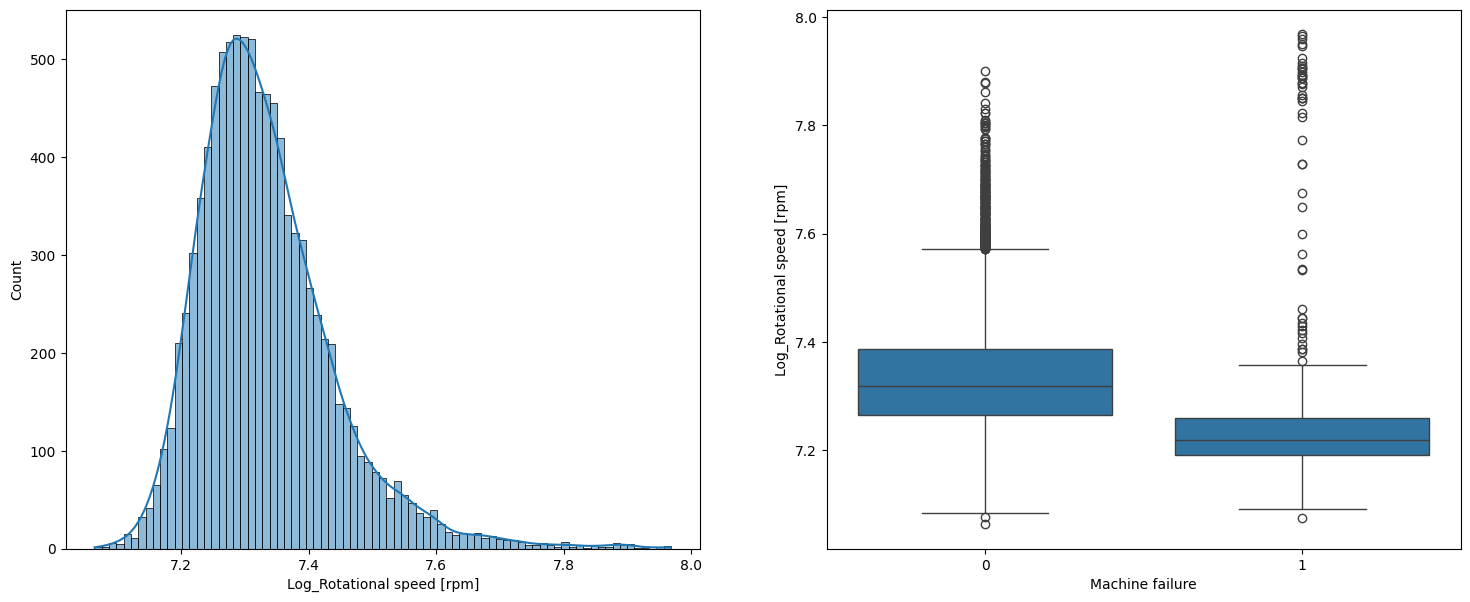

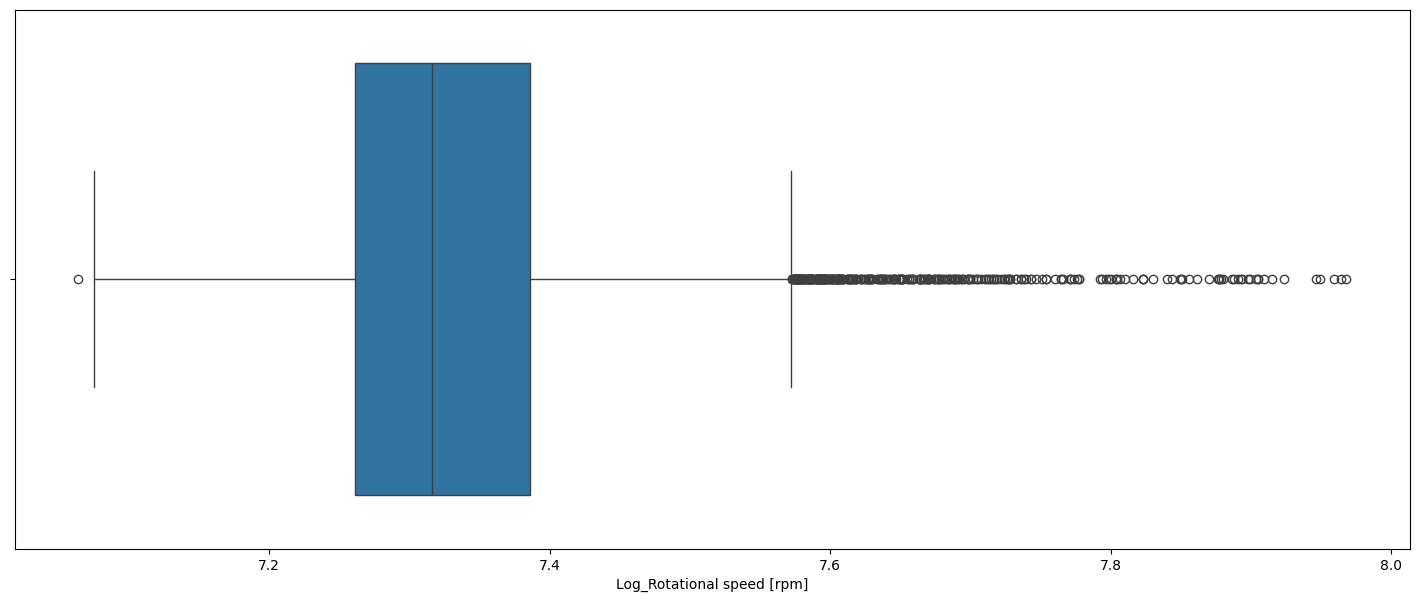

In [25]:
# Relación de la columna "Log_Rotational speed [rpm]" con "Machine failure"

fig, axes = plt.subplots(1, 2, figsize = (18, 7))

sns.histplot(x = df_principal["Log_Rotational speed [rpm]"], kde = True, ax = axes[0]);
sns.boxplot(x = df_principal["Machine failure"], y = df_principal["Log_Rotational speed [rpm]"], ax = axes[1]);
plt.show()


plt.figure(figsize = (18, 7))

sns.boxplot(x = df_principal["Log_Rotational speed [rpm]"]);
plt.show()

In [26]:
#No hay una mejora apreciable ... probaremos eliminando los outliers que quedan fuera del IQR
# # Manejo de outliers Columna "Rotational speed [rpm]"
# Calculo de cuartiles - "Rotational speed [rpm]"

q1 = df_principal["Rotational speed [rpm]"].quantile(q = 0.25)  # Q1
q3 = df_principal["Rotational speed [rpm]"].quantile(q = 0.75)  # Q3

# Rango intercuartil (IQR)
iqr = q3 - q1

# Calcular los limites inferior y superior
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

print(f"IQR: [{limite_inferior}, {limite_superior}]")

df_principal = df_principal[df_principal["Rotational speed [rpm]"].between(limite_inferior, limite_superior)]

print(f"df: {df_principal.shape}")

IQR: [1139.5, 1895.5]
df: (9582, 15)


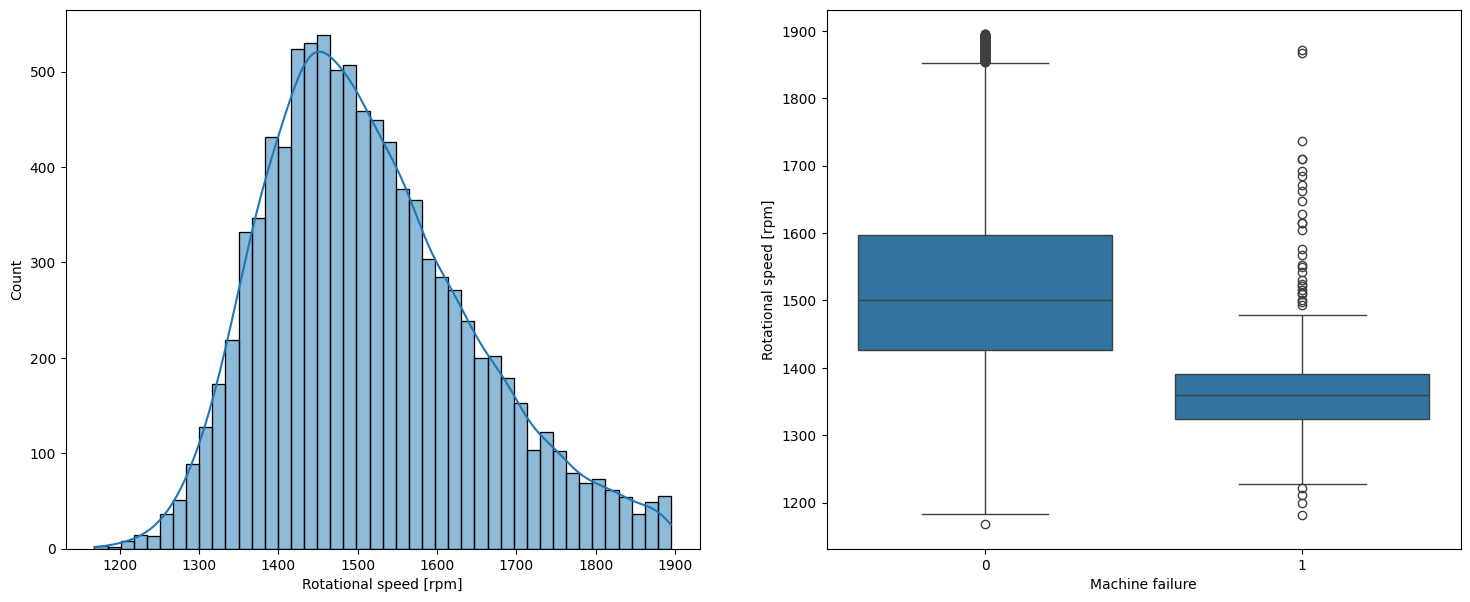

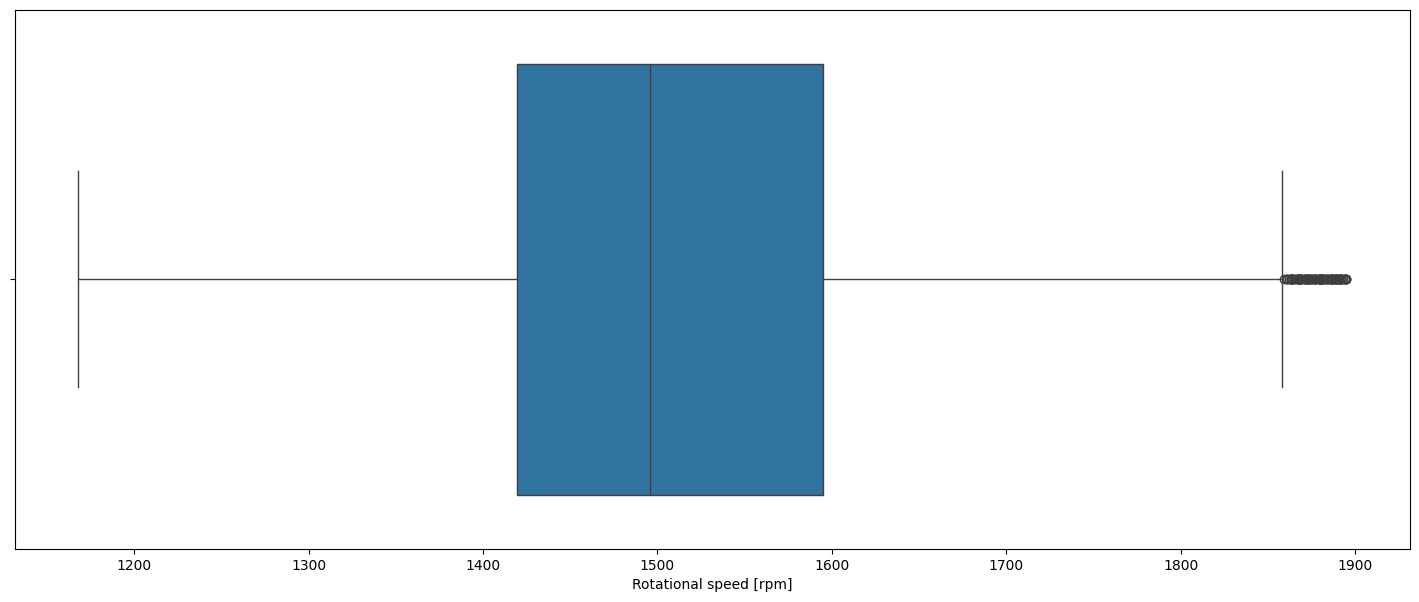

In [27]:
#Se han eliminado 418 filas, un 0,4% ... no parece ser relevante

# Relación de la columna "Rotational speed [rpm]" con "Machine failure"

fig, axes = plt.subplots(1, 2, figsize = (18, 7))

sns.histplot(x = df_principal["Rotational speed [rpm]"], kde = True, ax = axes[0]);
sns.boxplot(x = df_principal["Machine failure"], y = df_principal["Rotational speed [rpm]"], ax = axes[1]);
plt.show()


plt.figure(figsize = (18, 7))

sns.boxplot(x = df_principal["Rotational speed [rpm]"]);
plt.show()

In [28]:
#Column "Torque [Nm]"
df_principal["Torque [Nm]"].describe()

count    9582.000000
mean       40.907483
std         9.103176
min        20.100000
25%        34.200000
50%        40.600000
75%        47.100000
max        76.600000
Name: Torque [Nm], dtype: float64

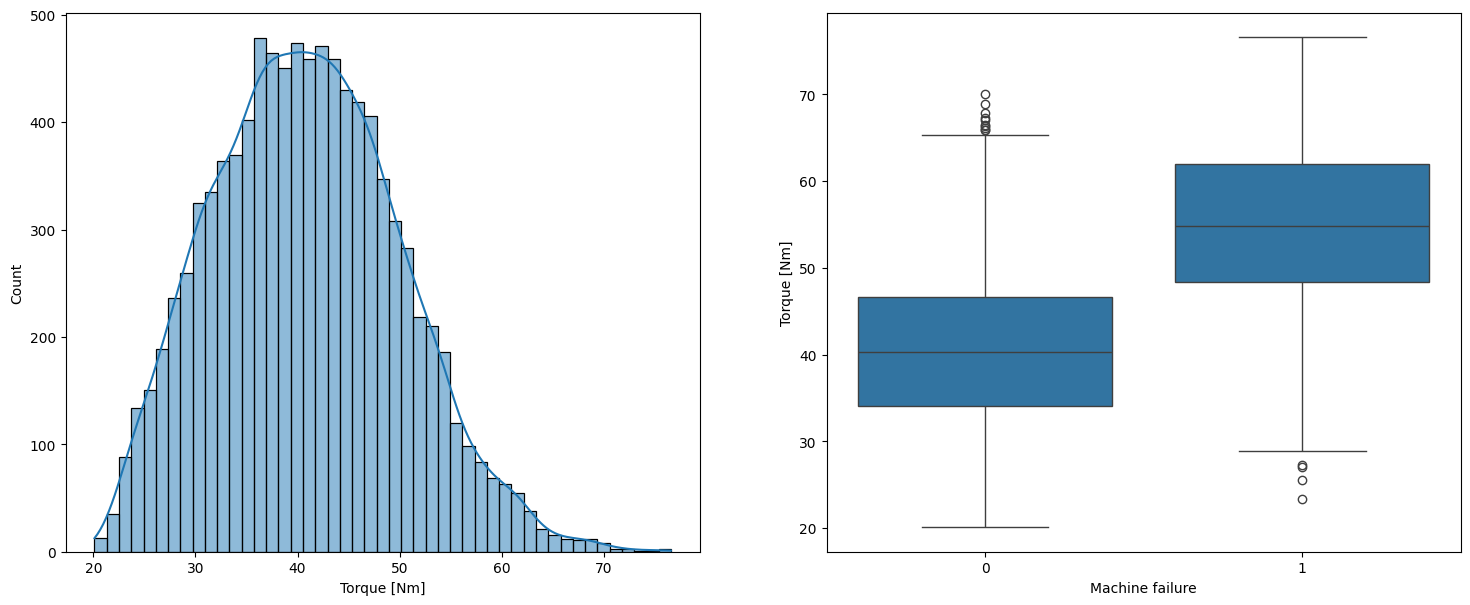

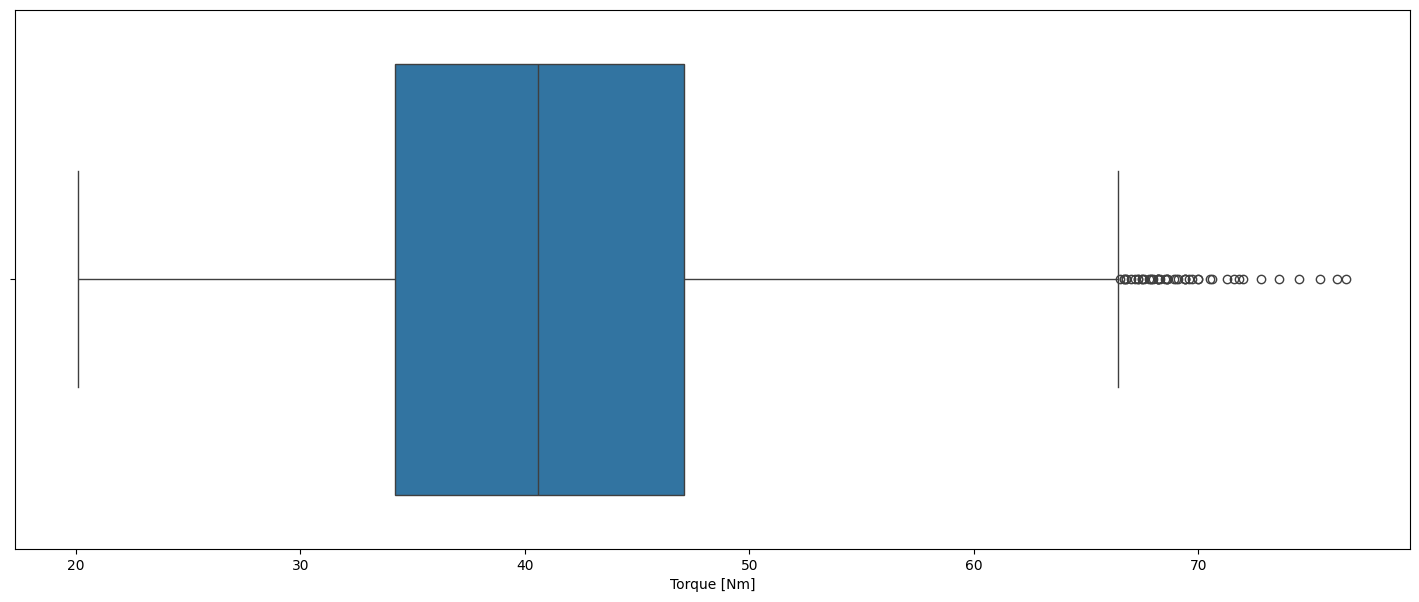

In [29]:
# Relación de la columna "Torque [Nm]" con "Machine failure"

fig, axes = plt.subplots(1, 2, figsize = (18, 7))

sns.histplot(x = df_principal["Torque [Nm]"], kde = True, ax = axes[0]);
sns.boxplot(x = df_principal["Machine failure"], y = df_principal["Torque [Nm]"], ax = axes[1]);
plt.show()


plt.figure(figsize = (18, 7))

sns.boxplot(x = df_principal["Torque [Nm]"]);
plt.show()

In [30]:
#Tambien tiene outliers, pero se ve que no son tantos ni están tan lejos...
# lo dejaremos tal cual

In [31]:
#Column "Tool wear [min]"
df_principal["Tool wear [min]"].describe()

count    9582.000000
mean      108.022334
std        63.582966
min         0.000000
25%        53.000000
50%       108.000000
75%       162.000000
max       253.000000
Name: Tool wear [min], dtype: float64

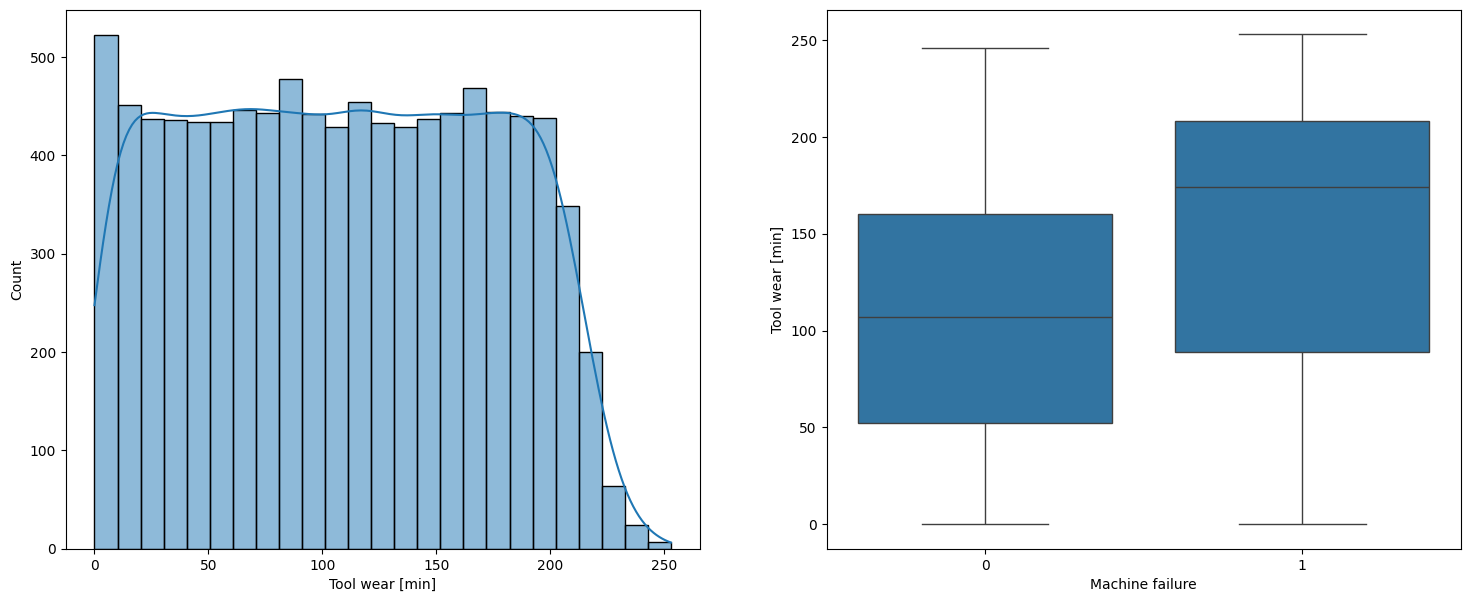

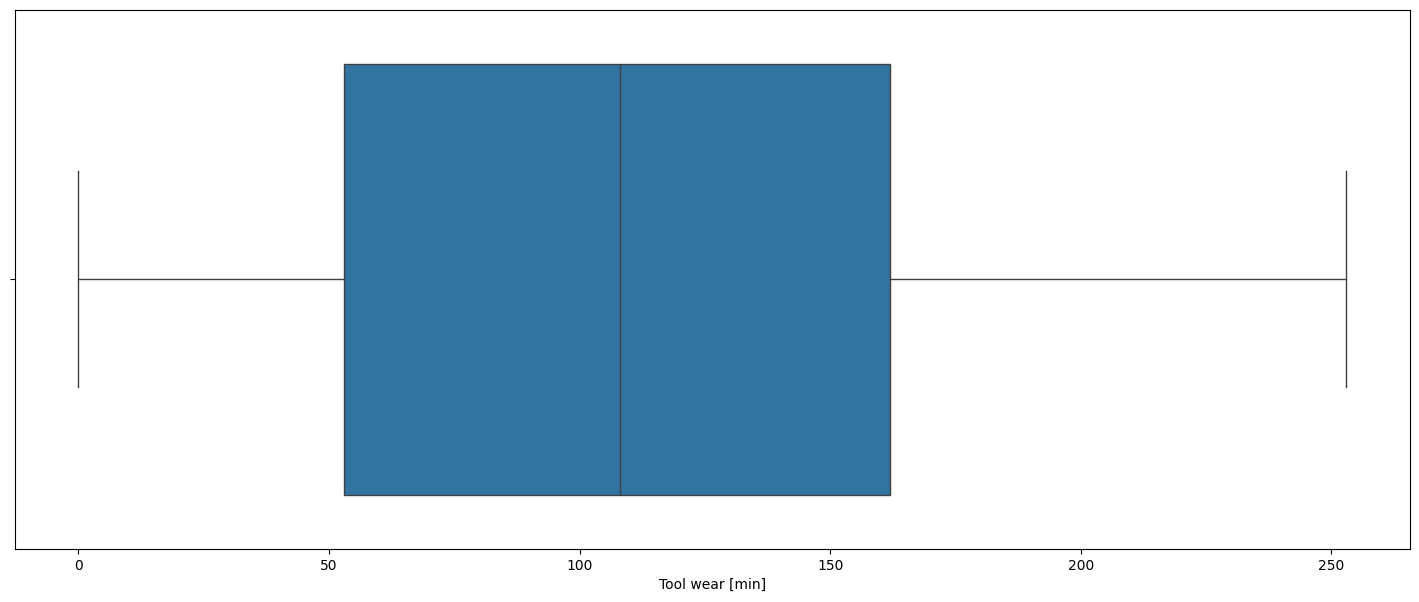

In [32]:
# Relación de la columna "Tool wear [min]" con "Machine failure"

fig, axes = plt.subplots(1, 2, figsize = (18, 7))

sns.histplot(x = df_principal["Tool wear [min]"], kde = True, ax = axes[0]);
sns.boxplot(x = df_principal["Machine failure"], y = df_principal["Tool wear [min]"], ax = axes[1]);
plt.show()


plt.figure(figsize = (18, 7))

sns.boxplot(x = df_principal["Tool wear [min]"]);
plt.show()

In [33]:
df_principal["TWF"].value_counts()

TWF
0    9540
1      42
Name: count, dtype: int64

In [34]:
df_principal["HDF"].value_counts()

HDF
0    9467
1     115
Name: count, dtype: int64

In [35]:
df_principal["PWF"].value_counts()

PWF
0    9518
1      64
Name: count, dtype: int64

In [36]:
df_principal["OSF"].value_counts()

OSF
0    9484
1      98
Name: count, dtype: int64

In [37]:
df_principal["RNF"].value_counts()

RNF
0    9563
1      19
Name: count, dtype: int64

En estas últimas 5 columnas hay mucho desbalanceo

In [38]:
# Columna "Machine failure"

# Esta es la columna que queremos predecir
# En este caso estamos haciendo una clasificación, por lo que esta columna debe tener valores enteros

df_principal["Machine failure"].value_counts()

Machine failure
0    9278
1     304
Name: count, dtype: int64

In [39]:
# Por último vamos a eliminar las columnas que no hagan falta

# Decidimos eliminar "UDI" y "Product ID"

df_principal_reducido = df_principal.copy()

df_principal_reducido.drop(["UDI", "Product ID", "TWF", "HDF", "PWF", "OSF", "RNF", "Log_Rotational speed [rpm]"], axis = 1, inplace = True)

df_principal_reducido

Type  Air temperature [K]  Process temperature [K]  \
0        2                298.1                    308.6   
1        1                298.2                    308.7   
2        1                298.1                    308.5   
3        1                298.2                    308.6   
4        1                298.2                    308.7   
...    ...                  ...                      ...   
9995     2                298.8                    308.4   
9996     0                298.9                    308.4   
9997     2                299.0                    308.6   
9998     0                299.0                    308.7   
9999     2                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  
0                       1551         42.8                0                0  
1                       1408         46.3                3                0  
2                       1498         49.4                5                0  
3                       1433         39.5                7                0  
4                       1408         40.0                9                0  
...                      ...          ...              ...              ...  
9995                    1604         29.5               14                0  
9996                    1632         31.8               17                0  
9997                    1645         33.4               22                0  
9998                    1408         48.5               25                0  
9999                    1500         40.2               30                0  

[9582 rows x 7 columns]

Preparación de los datos: Filtrar el conjunto de datos por cada tipo de máquina y dividirlo en conjuntos de entrenamiento y prueba.

In [40]:
from sklearn.model_selection import train_test_split

# Lista para almacenar los conjuntos de datos divididos por tipo de máquina
datos_por_type_maquina = []

# Obtener los tipos únicos de máquina
type_maquina_unicos = df_principal_reducido["Type"].unique()

# Filtrar y dividir los datos por cada tipo de máquina
for type_maquina in type_maquina_unicos:
    # Filtrar el DataFrame por tipo de máquina
    datos_filtrados = df_principal_reducido[df_principal_reducido["Type"] == type_maquina].copy()
    
    # Dividir los datos en características (X) y variable objetivo (y)
    X = datos_filtrados.drop(columns=["Machine failure"])  
    y = datos_filtrados["Machine failure"]  
    
    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Guardar los conjuntos de datos divididos en la lista
    datos_por_type_maquina.append((X_train, X_test, y_train, y_test))



Entrenamiento y evaluación del modelo para cada tipo de máquina: Para cada subconjunto de datos correspondiente a un tipo de máquina, aplicar el algoritmo KNeighborsClassifier, entrenar el modelo y evaluar su rendimiento. Al mismo tiempo se realiza el ajuste de los hiperparámetros: búsqueda de n_neighbors del modelo KNeighborsClassifier.

In [41]:
from imblearn.over_sampling import SMOTE

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Lista para almacenar los modelos entrenados
trained_models = []

# Inicializar una lista para almacenar la precisión del modelo para cada valor de k
list_accuracy = []

# Iterar sobre diferentes valores de k
for k in range(1, 60):
    # Inicializar una lista para almacenar los valores de precisión para cada tipo de máquina
    accuracy_por_type = []
    
   # Inicializar el modelo con el valor actual de k
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    
    # Iterar sobre los conjuntos de datos por tipo de máquina
    for (X_train, X_test, y_train, y_test), type_maquina in zip(datos_por_type_maquina, type_maquina_unicos):
        # Aplicar SMOTE al conjunto de datos de entrenamiento solo si es necesario (si hay desequilibrio)
        if sum(y_train) < len(y_train):
            smote = SMOTE(random_state=42)
            X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
        else:
            X_train_resampled, y_train_resampled = X_train, y_train
    
        # Entrenar el modelo con los datos equilibrados
        knn_classifier.fit(X_train_resampled, y_train_resampled)
    
        # Predecir en el conjunto de prueba
        yhat = knn_classifier.predict(X_test)
    
        # Calcular la precisión del modelo
        accuracy = accuracy_score(y_test, yhat)
        
        # Almacenar la precisión del modelo para este tipo de máquina
        accuracy_por_type.append(accuracy)
    
        # Guardar el modelo entrenado
        trained_models.append(knn_classifier)
        
    # Calcular el promedio de la precisión para este valor de k
    promedio_accuracy = sum(accuracy_por_type) / len(accuracy_por_type)
    
    # Imprimir el promedio de la precisión para este valor de k
    print(f"k: {k}, Precisión promedio del modelo para todos los tipos de máquina: {promedio_accuracy}")
    
    # Guardar la precisión promedio para este valor de k
    list_accuracy.append([k, promedio_accuracy])


k: 1, Precisión promedio del modelo para todos los tipos de máquina: 0.8857544110684468
k: 2, Precisión promedio del modelo para todos los tipos de máquina: 0.9097355237932881
k: 3, Precisión promedio del modelo para todos los tipos de máquina: 0.8681969900355736
k: 4, Precisión promedio del modelo para todos los tipos de máquina: 0.8915316042103664
k: 5, Precisión promedio del modelo para todos los tipos de máquina: 0.8604094583575036
k: 6, Precisión promedio del modelo para todos los tipos de máquina: 0.8805977537551736
k: 7, Precisión promedio del modelo para todos los tipos de máquina: 0.8554995600277078
k: 8, Precisión promedio del modelo para todos los tipos de máquina: 0.8719414136614679
k: 9, Precisión promedio del modelo para todos los tipos de máquina: 0.8508817871756431
k: 10, Precisión promedio del modelo para todos los tipos de máquina: 0.8604064311504804
k: 11, Precisión promedio del modelo para todos los tipos de máquina: 0.8465745345051537
k: 12, Precisión promedio del 

Análisis de resultados: Analiza las métricas de evaluación del modelo (por ejemplo, precisión) para cada tipo de máquina. Examina si el modelo funciona mejor para un tipo de máquina en particular o si hay algún patrón interesante en los resultados.

In [42]:
list_accuracy = np.array(list_accuracy)

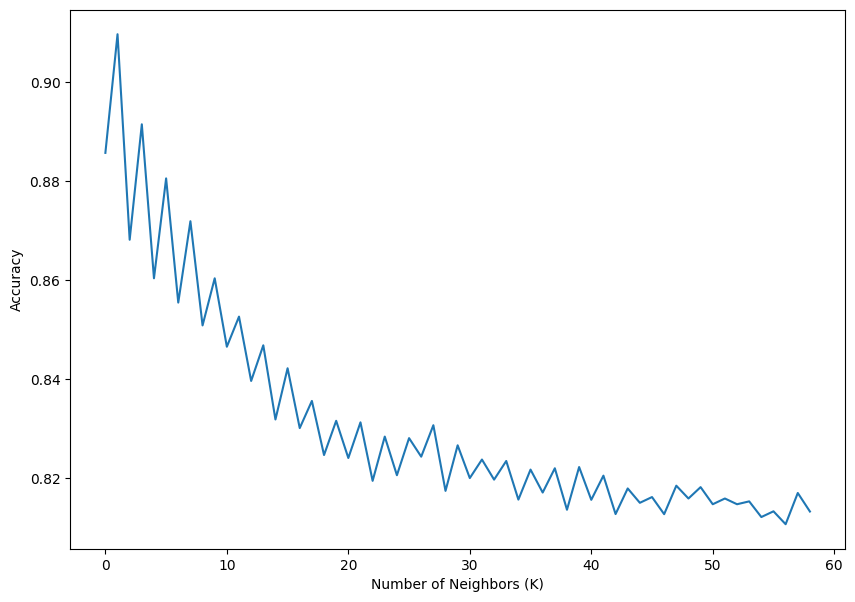

In [43]:
plt.figure(figsize = (10, 7))

plt.plot(list_accuracy[:, 1])

plt.ylabel("Accuracy")
plt.xlabel("Number of Neighbors (K)")

plt.show()

In [44]:
mejor_indice = np.argmax(list_accuracy[:, 1])
mejor_indice

1

In [45]:
list_accuracy[mejor_indice, :]

# (k, accuracy)

array([2.        , 0.90973552])

Métricas para el tipo de máquina M:
  Precisión (Accuracy): 0.88
  Precisión (Precision): 0.07246376811594203
  Recall: 0.5
  F1-Score: 0.12658227848101267
  Jaccard Score: 0.06756756756756757
  ROC AUC Score: 0.6933628318584071


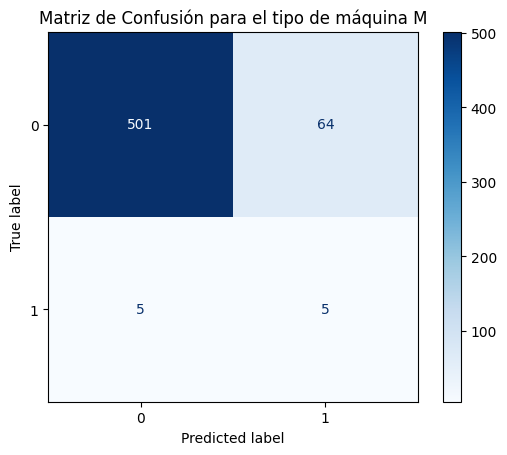



Métricas para el tipo de máquina L:
  Precisión (Accuracy): 0.8624891209747607
  Precisión (Precision): 0.14634146341463414
  Recall: 0.5714285714285714
  F1-Score: 0.23300970873786409
  Jaccard Score: 0.13186813186813187
  ROC AUC Score: 0.7224803200412957


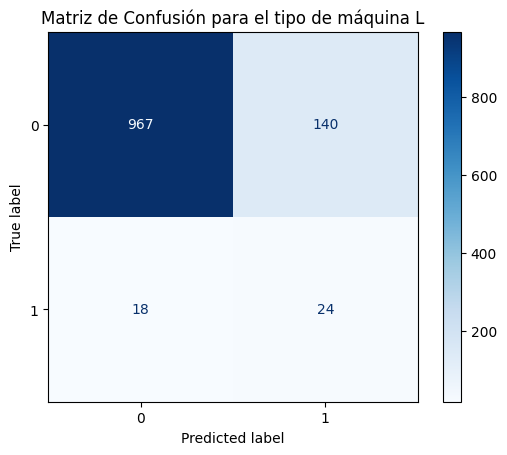



Métricas para el tipo de máquina H:
  Precisión (Accuracy): 0.8608247422680413
  Precisión (Precision): 0.07407407407407407
  Recall: 0.5
  F1-Score: 0.12903225806451613
  Jaccard Score: 0.06896551724137931
  ROC AUC Score: 0.6842105263157896


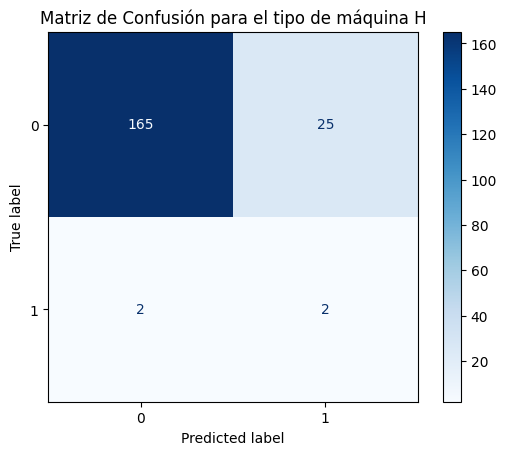

In [46]:
from sklearn.metrics import ConfusionMatrixDisplay

# Iterar sobre los modelos entrenados y calcular las métricas para cada uno
for (X_train, X_test, y_train, y_test), type_maquina, knn_classifier in zip(datos_por_type_maquina, type_maquina_unicos, trained_models):
    # Predecir en el conjunto de prueba
    yhat = knn_classifier.predict(X_test)
    
    # Calcular las métricas
    accuracy = accuracy_score(y_test, yhat)
    precision = precision_score(y_test, yhat)
    recall = recall_score(y_test, yhat)
    f1 = f1_score(y_test, yhat)
    jaccard = jaccard_score(y_test, yhat)
    roc_auc = roc_auc_score(y_test, yhat)
    confusion = confusion_matrix(y_test, yhat)
    
    # Imprimir las métricas
    print(f"Métricas para el tipo de máquina {type_LabelEncoder.inverse_transform([type_maquina])[0]}:")
    print(f"  Precisión (Accuracy): {accuracy}")
    print(f"  Precisión (Precision): {precision}")
    print(f"  Recall: {recall}")
    print(f"  F1-Score: {f1}")
    print(f"  Jaccard Score: {jaccard}")
    print(f"  ROC AUC Score: {roc_auc}")

    # Visualizar la matriz de confusión como un gráfico
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion)
    disp.plot(cmap='Blues')  # Especifica el mapa de color como 'Blues'
    plt.title(f"Matriz de Confusión para el tipo de máquina {type_LabelEncoder.inverse_transform([type_maquina])[0]}")
    plt.show()
    print("\n")


Nearest Centroid

In [47]:
from sklearn.neighbors import NearestCentroid


In [48]:
# Lista para almacenar los modelos entrenados de Nearest Centroid
trained_nc_models = []

# Iterar sobre los conjuntos de datos por tipo de máquina
for (X_train, X_test, y_train, y_test), type_maquina in zip(datos_por_type_maquina, type_maquina_unicos):
    # Inicializar el clasificador Nearest Centroid
    nc_classifier = NearestCentroid()
    
    # Entrenar el modelo
    nc_classifier.fit(X_train, y_train)
    
    # Predecir en el conjunto de prueba
    yhat = nc_classifier.predict(X_test)
    
    # Calcular la precisión del modelo
    accuracy = accuracy_score(y_test, yhat)
    
    # Imprimir la precisión del modelo
    print(f"Precisión del modelo Nearest Centroid para el tipo de máquina {type_LabelEncoder.inverse_transform([type_maquina])[0]}: {accuracy}")
    
    # Guardar el modelo entrenado
    trained_nc_models.append(nc_classifier)


Precisión del modelo Nearest Centroid para el tipo de máquina M: 0.7217391304347827
Precisión del modelo Nearest Centroid para el tipo de máquina L: 0.7049608355091384
Precisión del modelo Nearest Centroid para el tipo de máquina H: 0.6082474226804123


Evaluar el rendimiento del Nearest Centroid:

Métricas para el tipo de máquina M:
  Precisión (Accuracy): 0.7217391304347827
  Precisión (Precision): 0.05357142857142857
  Recall: 0.9
  F1-Score: 0.10112359550561797
  Jaccard Score: 0.06896551724137931
  ROC AUC Score: 0.6842105263157896


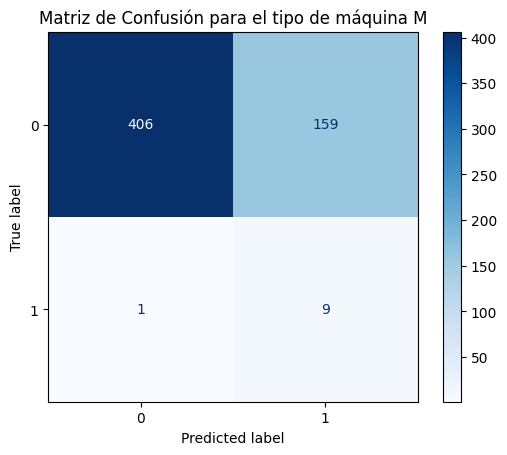



Métricas para el tipo de máquina L:
  Precisión (Accuracy): 0.7049608355091384
  Precisión (Precision): 0.09973045822102426
  Recall: 0.8809523809523809
  F1-Score: 0.1791767554479419
  Jaccard Score: 0.06896551724137931
  ROC AUC Score: 0.6842105263157896


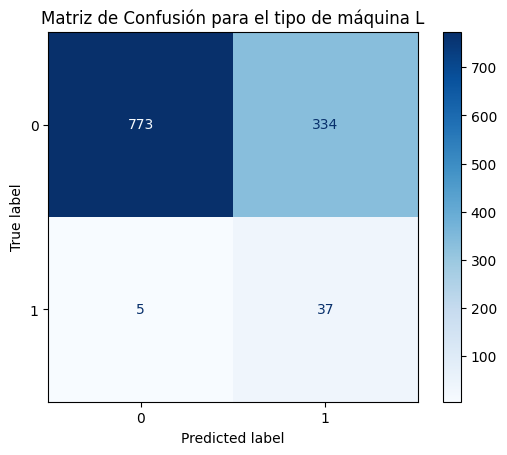



Métricas para el tipo de máquina H:
  Precisión (Accuracy): 0.6082474226804123
  Precisión (Precision): 0.038461538461538464
  Recall: 0.75
  F1-Score: 0.07317073170731707
  Jaccard Score: 0.06896551724137931
  ROC AUC Score: 0.6842105263157896


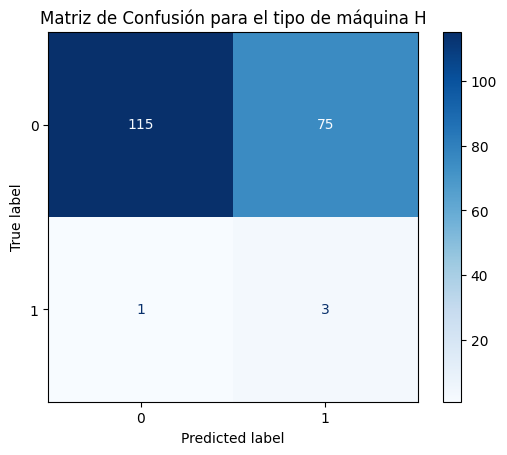

In [49]:
# Iterar sobre los modelos entrenados de Nearest Centroid y calcular las métricas para cada uno
for (X_train, X_test, y_train, y_test), type_maquina, nc_classifier in zip(datos_por_type_maquina, type_maquina_unicos, trained_nc_models):
    # Predecir en el conjunto de prueba
    yhat = nc_classifier.predict(X_test)
    
    # Calcular las métricas
    accuracy = accuracy_score(y_test, yhat)
    precision = precision_score(y_test, yhat)
    recall = recall_score(y_test, yhat)
    f1 = f1_score(y_test, yhat)
    confusion = confusion_matrix(y_test, yhat)
    
    # Imprimir las métricas
    print(f"Métricas para el tipo de máquina {type_LabelEncoder.inverse_transform([type_maquina])[0]}:")
    print(f"  Precisión (Accuracy): {accuracy}")
    print(f"  Precisión (Precision): {precision}")
    print(f"  Recall: {recall}")
    print(f"  F1-Score: {f1}")
    print(f"  Jaccard Score: {jaccard}")
    print(f"  ROC AUC Score: {roc_auc}")

    # Visualizar la matriz de confusión como un gráfico
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion)
    disp.plot(cmap='Blues')  # Especifica el mapa de color como 'Blues'
    plt.title(f"Matriz de Confusión para el tipo de máquina {type_LabelEncoder.inverse_transform([type_maquina])[0]}")
    plt.show()
    print("\n")


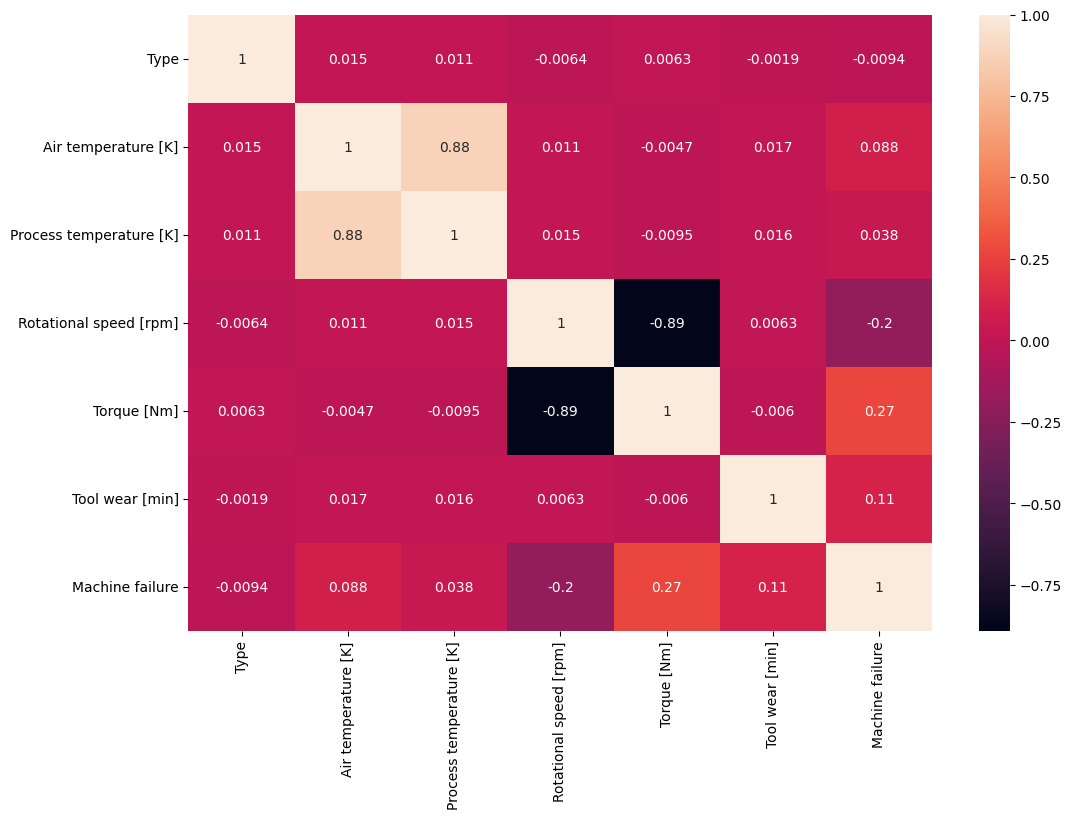

In [50]:
### Correlación

plt.figure(figsize = (12, 8))

sns.heatmap(df_principal_reducido.corr(), annot = True)
plt.show()

In [51]:
# Guardamos en .csv

df_principal_reducido.to_csv("machine failure_preprocesamiento.csv", index = False)

In [52]:
# Conservar la columna "Type" en el DataFrame
model_df = df_principal_reducido.copy()

# Ignorar la columna "Machine failure" en el DataFrame
ignore_cols = ['Machine failure']
model_df.drop(columns=ignore_cols, inplace=True)

model_df

Type  Air temperature [K]  Process temperature [K]  \
0        2                298.1                    308.6   
1        1                298.2                    308.7   
2        1                298.1                    308.5   
3        1                298.2                    308.6   
4        1                298.2                    308.7   
...    ...                  ...                      ...   
9995     2                298.8                    308.4   
9996     0                298.9                    308.4   
9997     2                299.0                    308.6   
9998     0                299.0                    308.7   
9999     2                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  
0                       1551         42.8                0  
1                       1408         46.3                3  
2                       1498         49.4                5  
3                       1433         39.5                7  
4                       1408         40.0                9  
...                      ...          ...              ...  
9995                    1604         29.5               14  
9996                    1632         31.8               17  
9997                    1645         33.4               22  
9998                    1408         48.5               25  
9999                    1500         40.2               30  

[9582 rows x 6 columns]

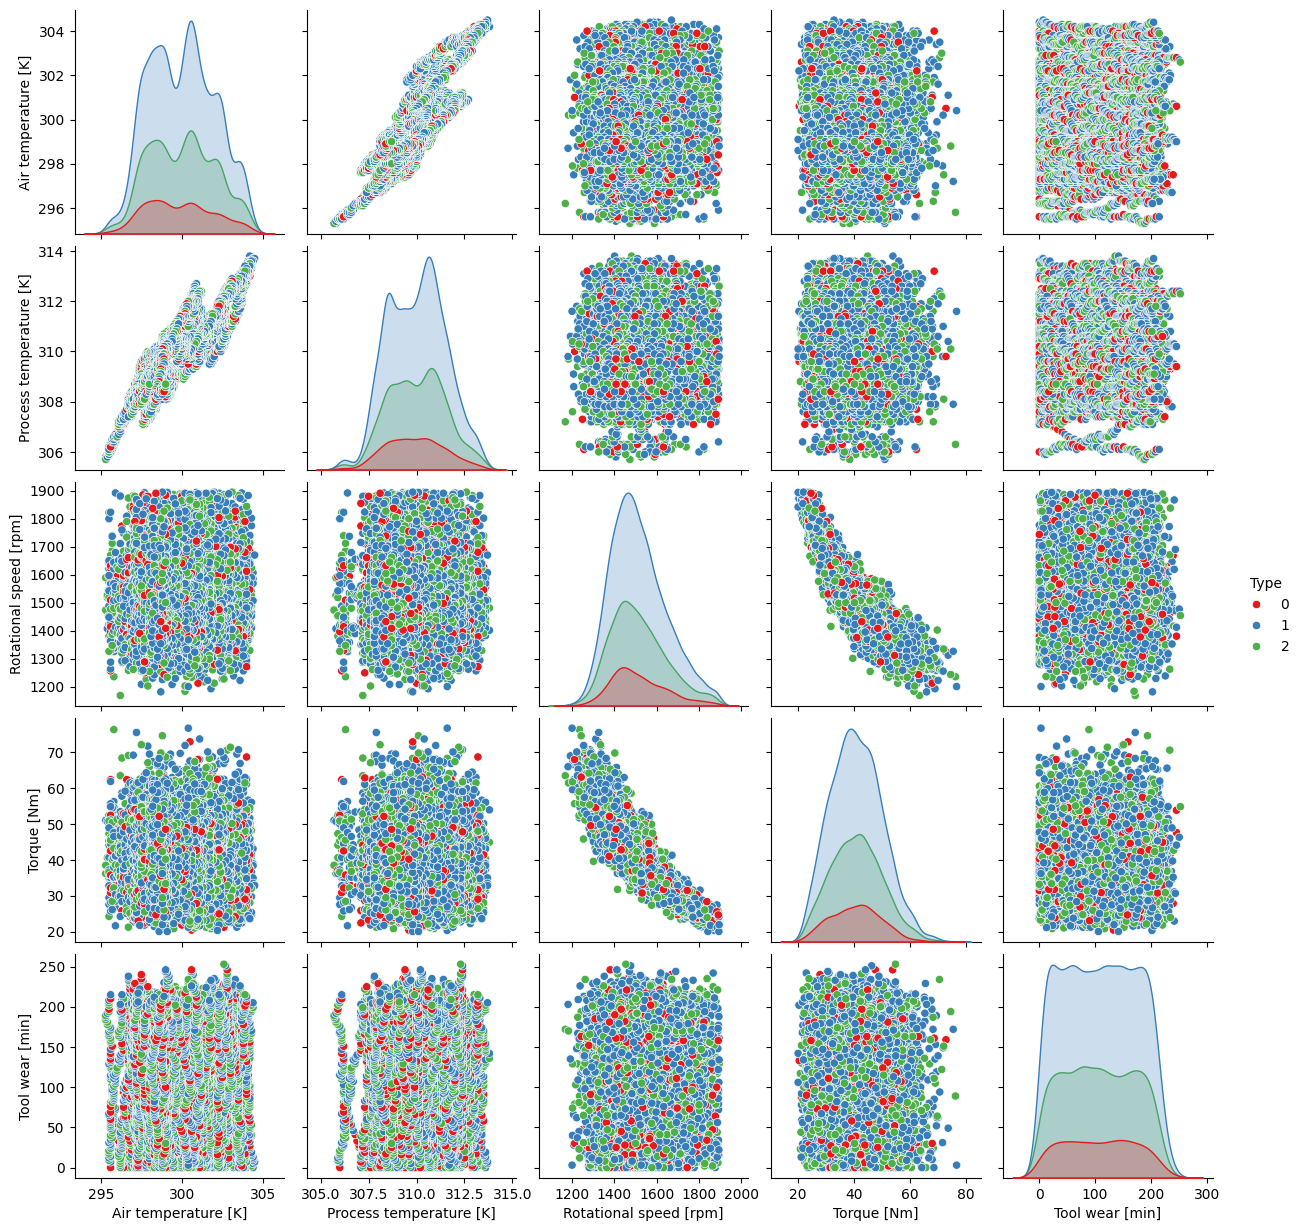

In [53]:
sns.pairplot(model_df, hue='Type', palette='Set1') 
plt.show()

### Objetivo: 
### ( En base a que variable nos ceñimos para definir cuando una maquina va a fallar o no ).
### Feature selection ( Pero la vibración ).
### Columna torque.
### Failure type nos guiaría en cuanto a clasificar por tipo de fallo dependiendo del tipo de datos.


¿ Se va a estropear o no la maquina ?
¿ Que tipo de encoding le metemos ?

Lo importante es maximizar el recall para que podamos evitar el falso negativo ( Que nos diga el modelo que la máquina no va a fallar cuando en realidad si que va a fallar).
Porque el falso positivo sería que nos diga el modelo que la máquina va a fallar y en realidad no va a fallar. Además después de revisión verificaríamos que efectivamente no va a fallar y que la máquina está correcta.
### Buscamos un recall lo mas cercano a 1 para tener el menor numero de falsos negativos.
### Buscamos una alta especificidad pero para los falsos positivos

In [54]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Metricas
from sklearn.metrics import classification_report, jaccard_score, roc_auc_score, f1_score, recall_score, precision_score, accuracy_score


In [55]:
df = pd.read_csv("machine failure.csv")
df

#Hacer un drop de TWF, HDF, PWF, OSF y RNGF. HAcer un sample de 8000 para quedarnos con el 80% del dataframe.

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860    M                298.1                    308.6   
1         2     L47181    L                298.2                    308.7   
2         3     L47182    L                298.1                    308.5   
3         4     L47183    L                298.2                    308.6   
4         5     L47184    L                298.2                    308.7   
...     ...        ...  ...                  ...                      ...   
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
0                       1551         42.8                0                0   
1                       1408         46.3                3                0   
2                       1498         49.4                5                0   
3                       1433         39.5                7                0   
4                       1408         40.0                9                0   
...                      ...          ...              ...              ...   
9995                    1604         29.5               14                0   
9996                    1632         31.8               17                0   
9997                    1645         33.4               22                0   
9998                    1408         48.5               25                0   
9999                    1500         40.2               30                0   

      TWF  HDF  PWF  OSF  RNF  
0       0    0    0    0    0  
1       0    0    0    0    0  
2       0    0    0    0    0  
3       0    0    0    0    0  
4       0    0    0    0    0  
...   ...  ...  ...  ...  ...  
9995    0    0    0    0    0  
9996    0    0    0    0    0  
9997    0    0    0    0    0  
9998    0    0    0    0    0  
9999    0    0    0    0    0  

[10000 rows x 14 columns]

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [57]:
df.shape

(10000, 14)

In [58]:
df.describe()

UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]  Machine failure  \
count            10000.000000  10000.000000     10000.000000     10000.000000   
mean              1538.776100     39.986910       107.951000         0.033900   
std                179.284096      9.968934        63.654147         0.180981   
min               1168.000000      3.800000         0.000000         0.000000   
25%               1423.000000     33.200000        53.000000         0.000000   
50%               1503.000000     40.100000       108.000000         0.000000   
75%               1612.000000     46.800000       162.000000         0.000000   
max               2886.000000     76.600000       253.000000         1.000000   

                TWF           HDF           PWF           OSF          RNF  
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.00000  
mean       0.004600      0.011500      0.009500      0.009800      0.00190  
std        0.067671      0.106625      0.097009      0.098514      0.04355  
min        0.000000      0.000000      0.000000      0.000000      0.00000  
25%        0.000000      0.000000      0.000000      0.000000      0.00000  
50%        0.000000      0.000000      0.000000      0.000000      0.00000  
75%        0.000000      0.000000      0.000000      0.000000      0.00000  
max        1.000000      1.000000      1.000000      1.000000      1.00000

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [60]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

#### Regresión Logítica

In [61]:
# Defino las características y el objetivo
features = ['Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF']
target = 'Machine failure'

X = df[features]
y = df[target]

# Divido los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Creo y entreno el modelo de regresión logística
logistic_regression = LogisticRegression(class_weight='balanced', random_state=42)
logistic_regression.fit(X_train, y_train)

# Obtengo las predicciones
yhat = logistic_regression.predict(X_test)

# Evaluo el modelo
print(classification_report(y_test, yhat))
print("ROC-AUC Score:", roc_auc_score(y_test, yhat))

# Imprimo los coeficientes del modelo
print("Coeficientes:", logistic_regression.coef_)
print("Intercepto:", logistic_regression.intercept_)

# Muestro las primeras predicciones y sus valores reales
for pred, real in zip(yhat[:5], y_test[:5]):
    print(f"Predicción: {pred} \tValor real: {real}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2907
           1       1.00      0.97      0.98        93

    accuracy                           1.00      3000
   macro avg       1.00      0.98      0.99      3000
weighted avg       1.00      1.00      1.00      3000

ROC-AUC Score: 0.9838709677419355
Coeficientes: [[-1.06082763e-03  5.10718332e-03  7.50052718e-03  6.85919112e+00
   8.34445969e+00  8.69830122e+00  7.37564070e+00]]
Intercepto: [-2.88499303]
Predicción: 0 	Valor real: 0
Predicción: 0 	Valor real: 1
Predicción: 0 	Valor real: 0
Predicción: 0 	Valor real: 0
Predicción: 0 	Valor real: 0


c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [62]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, yhat, labels = [0, 1])

array([[2907,    0],
       [   3,   90]], dtype=int64)

### Primero voy a tratar de escalar los datos y luego voy a tratar de aumentar el número de iteraciones si sigo experimentando problemas de convergencia

In [63]:
from sklearn.preprocessing import StandardScaler

# Defino las características y el objetivo
features = ['Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF']
target = 'Machine failure'

X = df[features]
y = df[target]

# Divido los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creo y entreno el modelo de regresión logística
logistic_regression = LogisticRegression(class_weight='balanced', random_state=42)
logistic_regression.fit(X_train_scaled, y_train)

# Obtengo las predicciones
yhat = logistic_regression.predict(X_test_scaled)

# Evaluo el modelo
print(classification_report(y_test, yhat))
print("ROC-AUC Score:", roc_auc_score(y_test, yhat))

# Imprimo los coeficientes del modelo
print("Coeficientes:", logistic_regression.coef_)
print("Intercepto:", logistic_regression.intercept_)

# Muestro las primeras predicciones y sus valores reales
for pred, real in zip(yhat[:5], y_test[:5]):
    print(f"Predicción: {pred} \tValor real: {real}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2907
           1       1.00      0.97      0.98        93

    accuracy                           1.00      3000
   macro avg       1.00      0.98      0.99      3000
weighted avg       1.00      1.00      1.00      3000

ROC-AUC Score: 0.9838709677419355
Coeficientes: [[0.36586476 0.62639576 0.37596956 0.80804893 1.37233405 1.14839943
  1.09244561]]
Intercepto: [-3.37375337]
Predicción: 0 	Valor real: 0
Predicción: 0 	Valor real: 1
Predicción: 0 	Valor real: 0
Predicción: 0 	Valor real: 0
Predicción: 0 	Valor real: 0


In [64]:
confusion_matrix(y_test, yhat, labels = [0, 1])

array([[2907,    0],
       [   3,   90]], dtype=int64)

In [65]:
# Creo y entreno el modelo de regresión logística con más iteraciones
logistic_regression = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
logistic_regression.fit(X_train_scaled, y_train)

# Obtengo las predicciones
yhat = logistic_regression.predict(X_test_scaled)

# Evaluo el modelo
print(classification_report(y_test, yhat))
print("ROC-AUC Score:", roc_auc_score(y_test, yhat))

# Imprimo los coeficientes del modelo
print("Coeficientes:", logistic_regression.coef_)
print("Intercepto:", logistic_regression.intercept_)

# Muestro las primeras predicciones y sus valores reales
for pred, real in zip(yhat[:5], y_test[:5]):
    print(f"Predicción: {pred} \tValor real: {real}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2907
           1       1.00      0.97      0.98        93

    accuracy                           1.00      3000
   macro avg       1.00      0.98      0.99      3000
weighted avg       1.00      1.00      1.00      3000

ROC-AUC Score: 0.9838709677419355
Coeficientes: [[0.36586476 0.62639576 0.37596956 0.80804893 1.37233405 1.14839943
  1.09244561]]
Intercepto: [-3.37375337]
Predicción: 0 	Valor real: 0
Predicción: 0 	Valor real: 1
Predicción: 0 	Valor real: 0
Predicción: 0 	Valor real: 0
Predicción: 0 	Valor real: 0


In [66]:
confusion_matrix(y_test, yhat, labels = [0, 1])

array([[2907,    0],
       [   3,   90]], dtype=int64)

### Parece que no tengo problemas de convergencia aún así voy a aumentar el número de iteraciones por si acaso

In [67]:
# Creo y entreno el modelo de regresión logística con más iteraciones
logistic_regression = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
logistic_regression.fit(X_train_scaled, y_train)

# Obtengo las predicciones
yhat = logistic_regression.predict(X_test_scaled)

# Evaluo el modelo
print(classification_report(y_test, yhat))
print("ROC-AUC Score:", roc_auc_score(y_test, yhat))

# Imprimo los coeficientes del modelo
print("Coeficientes:", logistic_regression.coef_)
print("Intercepto:", logistic_regression.intercept_)

# Muestro las primeras predicciones y sus valores reales
for pred, real in zip(yhat[:5], y_test[:5]):
    print(f"Predicción: {pred} \tValor real: {real}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2907
           1       1.00      0.97      0.98        93

    accuracy                           1.00      3000
   macro avg       1.00      0.98      0.99      3000
weighted avg       1.00      1.00      1.00      3000

ROC-AUC Score: 0.9838709677419355
Coeficientes: [[0.36586476 0.62639576 0.37596956 0.80804893 1.37233405 1.14839943
  1.09244561]]
Intercepto: [-3.37375337]
Predicción: 0 	Valor real: 0
Predicción: 0 	Valor real: 1
Predicción: 0 	Valor real: 0
Predicción: 0 	Valor real: 0
Predicción: 0 	Valor real: 0


### Random Forest

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score


# Define features and target
features = ['Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Air temperature [K]', 'Process temperature [K]']
target = 'Machine failure'

# Selección de características y variable objetivo
X = df[features]
y = df[target]

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo
model = RandomForestClassifier(n_estimators=1000, random_state=42)
model.fit(X_train, y_train)

# Predicción
y_pred = model.predict(X_test)

# Evaluación del modelo
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1939
           1       0.86      0.59      0.70        61

    accuracy                           0.98      2000
   macro avg       0.92      0.79      0.85      2000
weighted avg       0.98      0.98      0.98      2000

ROC-AUC Score: 0.7935347779402937


### Especificidad ( Specificity)

In [69]:
from sklearn.metrics import recall_score, confusion_matrix
def especificidad_score(true, predicted):
    tn, fp, fn, tp = confusion_matrix(true, predicted).ravel()
    especificidad = tn / (tn + fp)
    return especificidad

In [70]:
y_pred_proba = model.predict_proba(X_test)

scores = {
    "recall" : [],
    "precision": [],
    "especificidad": [],
}

for i in np.arange(0.0, 1.0, 0.001):
    yhat = [int(val[1] > i) for val in y_pred_proba]
    recall = recall_score(y_test, yhat)
    precision = precision_score(y_test, yhat)
    especificidad = especificidad_score(y_test, yhat)
    scores["recall"].append(recall)
    scores["precision"].append(precision)
    scores["especificidad"].append(especificidad)

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

In [71]:
import plotly.express as px

px.line(scores)

- **Precision**: La precisión mide la habilidad del clasificador para no predecir un caso negativo como un caso positivo.

$$Precision = \frac{VP }{VP + FP}$$

- **Recall (Sensibilidad o  Exhaustividad)**: Es la habilidad del clasificador para predecir casos positivos como positivos. Esta métrica se suele utilizar en el ámbito médico debido a que da prioridad a predicción o clasificación de pacientes enfermos como enfermos sin dar el mismo nivel de importancia si un paciente sano se clasifica como enfermo.

$$Recall = \frac{VP}{VP + FN}$$


- **Specificity (Especificidad)**: Muestra la habilidad del clasificador para predecir verdaderos negativos reales correctamente. 

$$ Specificity = \frac{VN}{VN + FP}$$

In [72]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred, labels = [0, 1])

array([[1933,    6],
       [  25,   36]], dtype=int64)

### tener esto en cuenta en smote and company.

[1537 +5     0
0           58]

In [73]:
#Data is already loaded and split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Here I create and train the model with class weights
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Métricas
print("Jaccard Index:", jaccard_score(y_test,  y_pred, average = "macro"))
print("Accuracy:"     , accuracy_score(y_test,  y_pred))
print("Precisión:"    , precision_score(y_test,  y_pred, average = "macro"))
print("Sensibilidad:" , recall_score(y_test, y_pred, average = "macro"))
print("F1-score:"     , f1_score(y_test, y_pred, average = "macro"))
print("ROC AUC:"      , roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1939
           1       0.91      0.51      0.65        61

    accuracy                           0.98      2000
   macro avg       0.95      0.75      0.82      2000
weighted avg       0.98      0.98      0.98      2000

Jaccard Index: 0.7338076117318435
Accuracy: 0.9835
Precisión: 0.9482526479564359
Sensibilidad: 0.7533247660193272
F1-score: 0.8220904373610082
ROC AUC: 0.7533247660193271


### Aquí aplico SMOTE y un BalancedRandomForestClassifier

In [74]:
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
#smote = SMOTE(random_state=42)
#X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train a Balanced Random Forest model
model = BalancedRandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning:

The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning:

The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning:

The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False`

              precision    recall  f1-score   support

           0       1.00      0.90      0.94      1939
           1       0.23      0.97      0.37        61

    accuracy                           0.90      2000
   macro avg       0.61      0.93      0.66      2000
weighted avg       0.98      0.90      0.93      2000

ROC-AUC Score: 0.9317757167375443


#### Best results to detect machine failure ATM above!!!! Try to add threshold and check results

In [75]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred, labels = [0, 1])

array([[1738,  201],
       [   2,   59]], dtype=int64)

In [76]:
y_train.value_counts()

Machine failure
0    7722
1     278
Name: count, dtype: int64

In [77]:
y_pred_proba = model.predict_proba(X_test)

scores = {
    "recall" : [],
    "precision": [],
}

for i in np.arange(0.0, 1.0, 0.01):
    yhat = [int(val[1] > i) for val in y_pred_proba]
    recall = recall_score(y_test, yhat)
    precision = precision_score(y_test, yhat)
    scores["recall"].append(recall)
    scores["precision"].append(precision)

In [78]:
import plotly.express as px

px.line(scores)

In [79]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(sampling_strategy = 0.5, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train a Balanced Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1939
           1       0.46      0.72      0.56        61

    accuracy                           0.97      2000
   macro avg       0.72      0.85      0.77      2000
weighted avg       0.97      0.97      0.97      2000

ROC-AUC Score: 0.8472467640071356


In [80]:
#Aquí trato de ajustar la decisión threshold para mejorar el recall
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve

# I train the model
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train_resampled, y_train_resampled)

# Then I get the predicted probabilities
y_proba = model.predict_proba(X_test)[:, 1]

# I try to find the optimal threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]

# I apply the best threshold as per the analysis I did.
y_pred_adjusted = (y_proba >= best_threshold).astype(int)

# I evaluate the adjusted predictions
print(classification_report(y_test, y_pred_adjusted))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_adjusted))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1939
           1       0.67      0.56      0.61        61

    accuracy                           0.98      2000
   macro avg       0.83      0.77      0.80      2000
weighted avg       0.98      0.98      0.98      2000

ROC-AUC Score: 0.7743048216505043


The new results show some improvement in the recall for the failure class (class 1) but there is still room for improvement. Here’s an analysis and additional suggestions:
Analysis of Updated Results

    Precision for class 1 (Failure): 0.70
        This indicates that 70% of the predicted failures are correct.

    Recall for class 1 (Failure): 0.42
        The recall has improved, but the model is still missing 58% of actual failures.

    F1-score for class 1 (Failure): 0.52
        This reflects a balance between precision and recall, but it still indicates that the model struggles with detecting failures accurately.

    Support: 2307 instances of no failure and 93 instances of failure.
        The class imbalance continues to be a challenge.

Recommendations for Further Improvement

    Further Resampling:
        Try combining both oversampling the minority class and undersampling the majority class to see if this improves recall.

    Use Different Models:
        Consider using other models that might handle imbalance better, such as Gradient Boosting Machines (GBM) or XGBoost with appropriate class weights.

    Advanced Ensemble Techniques:
        Try ensemble techniques specifically designed for imbalanced data, like EasyEnsemble or BalanceCascade from the imbalanced-learn library.

    Feature Engineering:
        Add interaction terms or polynomial features that might capture the relationships between existing features more effectively.

    Hyperparameter Tuning:
        Perform a comprehensive grid search or random search for hyperparameter tuning. Focus on parameters that control the model complexity and class weight balancing.

    Custom Loss Functions:
        Implement custom loss functions that penalize false negatives more heavily than false positives.

In [81]:
# Renombro las columnas porque no está manejando bien los nombres de las columnas
df1 = df.rename(columns={
    'Rotational speed [rpm]': 'Rotational_speed_rpm',
    'Torque [Nm]': 'Torque_Nm',
    'Tool Wear [min]': 'Tool_wear_min'
})

# Verificamos los nuevos nombres de las columnas
print(df1.columns)

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational_speed_rpm', 'Torque_Nm',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')


In [82]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE

# Renombro las columnas porque no está manejando bien los nombres de las columnas
df = df.rename(columns={
    'Rotational speed [rpm]': 'Rotational_speed_rpm',
    'Torque [Nm]': 'Torque_Nm',
    'Tool wear [min]' : 'Tool_wear_min'
})

# Verificamos los nuevos nombres de las columnas
print(df.columns)

# Definir las características y el objetivo con los nuevos nombres
features1 = ['Rotational_speed_rpm', 'Torque_Nm', 'Tool_wear_min']
target = 'Machine failure'

X = df[features1]
y = df[target]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Aplicar SMOTE a los datos de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Entrenar un modelo XGBoost con pesos de clase
weights = {0: 1, 1: 2307 / 93}  # Ajustar el peso de la clase inversamente proporcional a la frecuencia de la clase
model = XGBClassifier(scale_pos_weight=weights[1], use_label_encoder=False, eval_metric='logloss')
model.fit(X_train_resampled, y_train_resampled)

# Predecir y evaluar
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational_speed_rpm', 'Torque_Nm',
       'Tool_wear_min', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')


              precision    recall  f1-score   support

           0       0.99      0.85      0.92      2907
           1       0.16      0.85      0.26        93

    accuracy                           0.85      3000
   macro avg       0.57      0.85      0.59      3000
weighted avg       0.97      0.85      0.90      3000

ROC-AUC Score: 0.8509437730949766


In [83]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred, labels = [0, 1])

array([[2478,  429],
       [  14,   79]], dtype=int64)

In [84]:
#Threshold Adjustment con XGBoost

# Predict probabilities
y_proba = model.predict_proba(X_test)[:, 1]

# Find the optimal threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]

# Apply the best threshold
y_pred_adjusted = (y_proba >= best_threshold).astype(int)

# Evaluate the adjusted predictions
print(classification_report(y_test, y_pred_adjusted))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_adjusted))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2907
           1       0.48      0.54      0.51        93

    accuracy                           0.97      3000
   macro avg       0.73      0.76      0.75      3000
weighted avg       0.97      0.97      0.97      3000

ROC-AUC Score: 0.7595292786044808


In [85]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred, labels = [0, 1])

array([[2478,  429],
       [  14,   79]], dtype=int64)

In [86]:
#Pruebo RandomForestClassifier() usando diferentes parametros

model = RandomForestClassifier(n_estimators     = 200,
                               criterion        = "entropy",
                               max_depth        = 15,
                               min_samples_split = 10,
                               max_features = "log2",
                               random_state = 42,
                               max_leaf_nodes = 40)

# Entrenamiento
model.fit(X_train, y_train)

#Predicciones
yhat = model.predict(X_test)

#Métricas
print("Jaccard Index:", jaccard_score(y_test, yhat, average = "macro"))
print("Accuracy:"     , accuracy_score(y_test, yhat))
print("Precisión:"    , precision_score(y_test, yhat, average = "macro"))
print("Sensibilidad:" , recall_score(y_test, yhat, average = "macro"))
print("F1-score:"     , f1_score(y_test, yhat, average = "macro"))

Jaccard Index: 0.6659750966664963
Accuracy: 0.9786666666666667
Precisión: 0.9170286599790635
Sensibilidad: 0.6871400512666866
F1-score: 0.7557388644910463


In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Normalizacion
from sklearn.preprocessing import MinMaxScaler

# Train, Test
from sklearn.model_selection import train_test_split

# Metricas
from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn. metrics import mean_absolute_error
from sklearn. metrics import mean_squared_error

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [88]:
# Normalización de datos

x_scaler = MinMaxScaler()
X = x_scaler.fit_transform(X)

X

array([[0.22293364, 0.53571429, 0.        ],
       [0.13969732, 0.58379121, 0.01185771],
       [0.19208382, 0.62637363, 0.01976285],
       ...,
       [0.27764843, 0.40659341, 0.08695652],
       [0.13969732, 0.61401099, 0.09881423],
       [0.19324796, 0.5       , 0.11857708]])

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape},  y_test: {y_test.shape}")

X_train: (7000, 3), y_train: (7000,)
X_test: (3000, 3),  y_test: (3000,)


### Modelo de árbol de decisión

In [90]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = "entropy", max_depth = 3)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [91]:
yhat = model.predict(X_test)

yhat

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [92]:
print("Jaccard Index:", jaccard_score(y_test, yhat, average = "macro"))
print("Accuracy:"     , accuracy_score(y_test, yhat))
print("Precisión:"    , precision_score(y_test, yhat, average = "macro"))
print("recall:"       , recall_score(y_test, yhat, average = "macro"))
print("F1-score:"     , f1_score(y_test, yhat, average = "macro"))

Jaccard Index: 0.5901733204179063
Accuracy: 0.9743333333333334
Precisión: 0.9044018817204301
recall: 0.6068388872243861
F1-score: 0.6643958908109852


## Confusion Matrix

In [93]:
confusion_matrix(y_test, yhat, labels = [0, 1])

array([[2903,    4],
       [  73,   20]], dtype=int64)

In [94]:
print(classification_report(y_test, yhat, digits = 3))

              precision    recall  f1-score   support

           0      0.975     0.999     0.987      2907
           1      0.833     0.215     0.342        93

    accuracy                          0.974      3000
   macro avg      0.904     0.607     0.664      3000
weighted avg      0.971     0.974     0.967      3000



### Atributos y Métodos

In [95]:
# .predict_proba()

model.predict_proba(X_test)

array([[0.99748879, 0.00251121],
       [0.99748879, 0.00251121],
       [0.99748879, 0.00251121],
       ...,
       [0.99748879, 0.00251121],
       [0.99748879, 0.00251121],
       [0.99748879, 0.00251121]])

In [96]:
X = df[features1]
y = df[target]

In [97]:
# .feature_importances_ es un atributo que retorna un array con las importancias de cada columna
# En este caso como entrenamos con 4 columnas tenemos un array de 4 elementos.

importances = model.feature_importances_

In [98]:
# Create a DataFrame to visualize the feature importances
feature_importances = pd.DataFrame({
    'Feature': features1,
    'Importance': importances
})

# Sort by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display
print(feature_importances)

                Feature  Importance
0  Rotational_speed_rpm    0.441985
1             Torque_Nm    0.291541
2         Tool_wear_min    0.266474


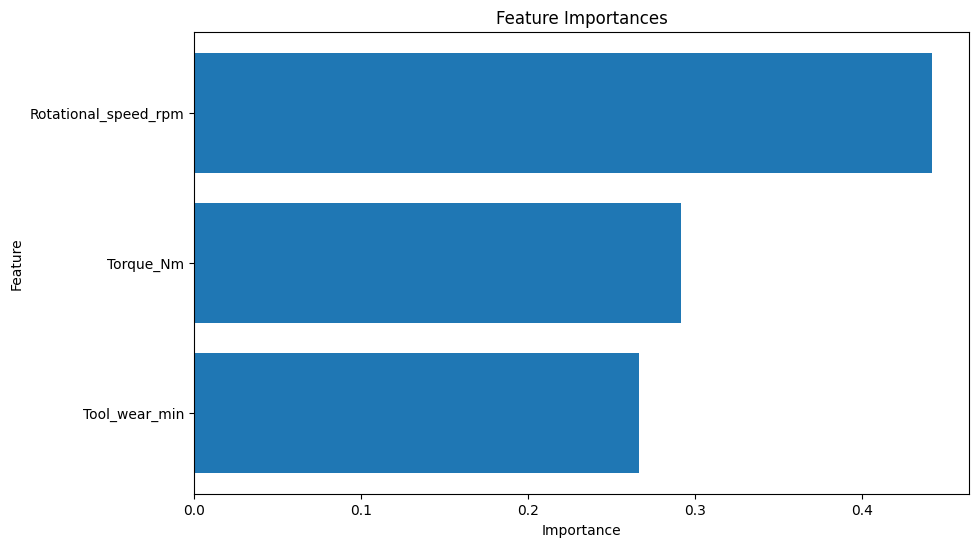

In [99]:
#Visualization of the feature importances.

plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [100]:
from sklearn.tree import plot_tree

plt.figure(figsize = (100, 200))

plot_tree(model) 

plt.savefig("Machine_failure_tree.jpg")

plt.show()

In [101]:
# Parametros del Modelo, definidos por defecto

print(f"criterion: {model.criterion}")
print(f"splitter: {model.splitter}")
print(f"max_depth: {model.max_depth}")
print(f"min_samples_split: {model.min_samples_split}")
print(f"min_samples_leaf: {model.min_samples_leaf}")
print(f"min_weight_fraction_leaf: {model.min_weight_fraction_leaf}")
print(f"max_features: {model.max_features}")
print(f"random_state: {model.random_state}")
print(f"max_leaf_nodes: {model.max_leaf_nodes}")
print(f"min_impurity_decrease: {model.min_impurity_decrease}")
print(f"class_weight: {model.class_weight}")
print(f"ccp_alpha: {model.ccp_alpha}")

criterion: entropy
splitter: best
max_depth: 3
min_samples_split: 2
min_samples_leaf: 1
min_weight_fraction_leaf: 0.0
max_features: None
random_state: None
max_leaf_nodes: None
min_impurity_decrease: 0.0
class_weight: None
ccp_alpha: 0.0


In [102]:
# .get_params() retorna un diccionario con los parametros del modelo

model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [103]:
print(f"Profundidad: {model.get_depth()}")
print(f"Numero de nodos hoja: {model.get_n_leaves()}")

Profundidad: 3
Numero de nodos hoja: 8


### SVM

In [104]:
# Normalización de datos

x_scaler = MinMaxScaler()
X = x_scaler.fit_transform(X)

X

array([[0.22293364, 0.53571429, 0.        ],
       [0.13969732, 0.58379121, 0.01185771],
       [0.19208382, 0.62637363, 0.01976285],
       ...,
       [0.27764843, 0.40659341, 0.08695652],
       [0.13969732, 0.61401099, 0.09881423],
       [0.19324796, 0.5       , 0.11857708]])

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape},  y_test: {y_test.shape}")

X_train: (7000, 3), y_train: (7000,)
X_test: (3000, 3),  y_test: (3000,)


In [106]:
yhat = model.predict(X_test)

yhat

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [107]:
from sklearn.svm import SVC
model = SVC(probability = True, kernel = "poly")
model.fit(X_train, y_train)

# probability = True para poder usar .predict_proba(), esto puede hacer que el algoritmo sea más lento

SVC(kernel='poly', probability=True)

In [108]:
yhat = model.predict(X_test)

yhat

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [109]:
print("Jaccard Index:", jaccard_score(y_test, yhat, average = "macro"))
print("Accuracy:"     , accuracy_score(y_test, yhat))
print("Precisión:"    , precision_score(y_test, yhat, average = "macro"))
print("Sensibilidad:" , recall_score(y_test, yhat, average = "macro"))
print("F1-score:"     , f1_score(y_test, yhat, average = "macro"))

Jaccard Index: 0.5117376478528043
Accuracy: 0.9703333333333334
Precisión: 0.9019706078824316
Sensibilidad: 0.5267097218060965
F1-score: 0.5429639557753437


### Matriz de confusión

In [110]:
confusion_matrix(y_test, yhat, labels = [0, 1])

array([[2906,    1],
       [  88,    5]], dtype=int64)

### Atributos y Métodos

In [111]:
# .predict_proba()

model.predict_proba(X_test)

# Solo se puede usar si probability = True

array([[0.97182492, 0.02817508],
       [0.97498337, 0.02501663],
       [0.99097559, 0.00902441],
       ...,
       [0.97948528, 0.02051472],
       [0.99034148, 0.00965852],
       [0.99791649, 0.00208351]])

In [112]:
model.support_vectors_

array([[0.08207218, 0.79258242, 0.22134387],
       [0.07683353, 0.73351648, 0.68774704],
       [0.10477299, 0.75961538, 0.7944664 ],
       ...,
       [0.09604191, 0.86401099, 0.81027668],
       [0.11990687, 0.60576923, 0.87747036],
       [0.11699651, 0.71978022, 0.82213439]])

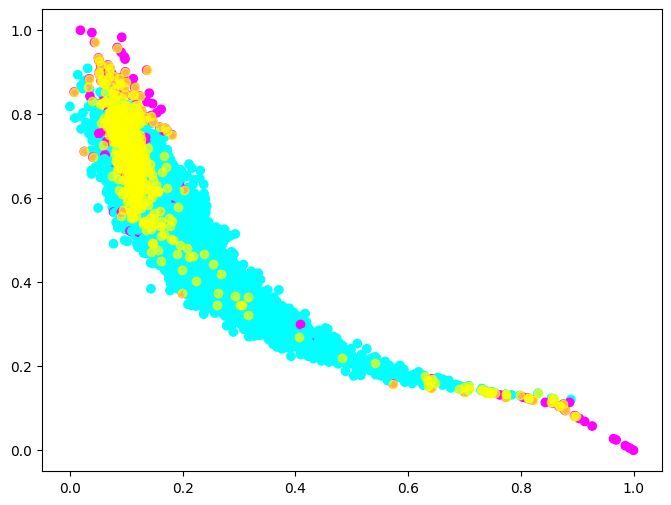

In [113]:
plt.figure(figsize = (8, 6))

#Puntos de Train
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train, cmap = "cool")

# Puntos de Test
plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test, cmap = "cool")

# Vectores de Soporte
vectores_soporte = model.support_vectors_

plt.plot(vectores_soporte[:, 0], vectores_soporte[:, 1], color = "yellow", marker = "o", linestyle = "", alpha = 0.7)

plt.show()

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



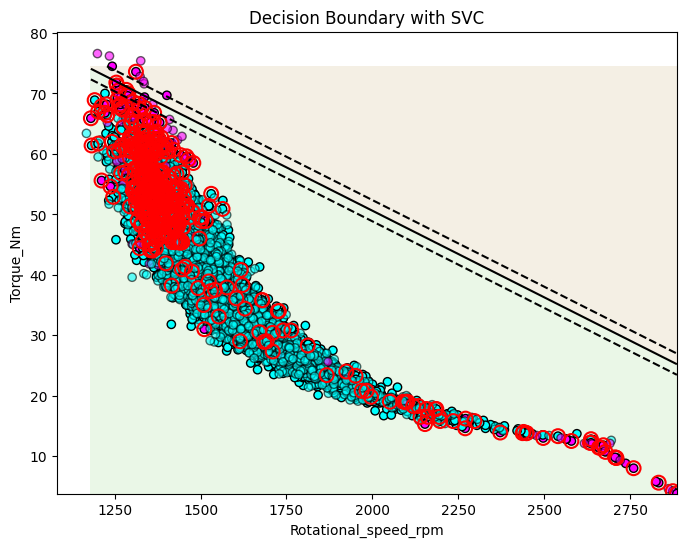

In [114]:
# Select two features for visualization
features_for_viz = ['Rotational_speed_rpm', 'Torque_Nm']
X_viz = df[features_for_viz]
y_viz = df[target]

# Split data for visualization
X_train_viz, X_test_viz, y_train_viz, y_test_viz = train_test_split(X_viz, y_viz, test_size=0.3, random_state=42)

# Train a model for visualization (using SVC for its decision_function)
viz_model = SVC(kernel='linear')
viz_model.fit(X_train_viz, y_train_viz)

# Create the mesh grid for plotting
x_min, x_max = X_train_viz.iloc[:, 0].min(), X_train_viz.iloc[:, 0].max()
y_min, y_max = X_train_viz.iloc[:, 1].min(), X_train_viz.iloc[:, 1].max()
XX, YY = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

# Calculate decision boundary
Z = viz_model.decision_function(np.c_[XX.ravel(), YY.ravel()])
Z = Z.reshape(XX.shape)

# Plotting
plt.figure(figsize=(8, 6))

# Plot the decision boundary and margin
plt.contourf(XX, YY, Z > 0, alpha=0.4, cmap='Pastel1')
plt.contour(XX, YY, Z, colors=['black'], linestyles=['--', '-', '--'], levels=[-1, 0, 1])

# Plot training points
plt.scatter(X_train_viz.iloc[:, 0], X_train_viz.iloc[:, 1], c=y_train_viz, cmap='cool', edgecolors='k')

# Plot testing points
plt.scatter(X_test_viz.iloc[:, 0], X_test_viz.iloc[:, 1], c=y_test_viz, cmap='cool', edgecolors='k', alpha=0.6)

# Highlight support vectors
plt.scatter(viz_model.support_vectors_[:, 0], viz_model.support_vectors_[:, 1], facecolors='none', edgecolors='r', s=100, linewidths=1.5)

plt.xlabel(features_for_viz[0])
plt.ylabel(features_for_viz[1])
plt.title('Decision Boundary with SVC')
plt.show()

### Como vamos a afrontar determinar los 5 tipos de fallo.
Filtramos el df por las filas que continen Fail y entrenamos 

Creamos una función donde recorre una lista de algoritmos y nos devuelve un df con la mejor metrica por tipo de variable 

Continua a otra función que basado en un df como anteriormente hemos creado entrena el modelo para cada tipo de variable y mejor métrica individualmente  

Se realiza un test con la separación de las 2000 filas restantes para comprobar la proximidad a la realidad

Este modelo al no asemejarse a la realidad lo suficiente, se ha entrenado posteriormente un modelo que solicitan encontrar el mejor tipo de cultivo según las características del suelo, pudiendo incluso usar las mismas funciones. Solo eliminando la parte de test final.


In [115]:

df_principal_completo_ = pd.read_csv("machine failure.csv")

In [116]:
df_principal_completo = df_principal_completo_.iloc[0: 8000]
df2_para_prueba_final = df_principal_completo_.iloc[8000: -1]
df2_para_prueba_final= df2_para_prueba_final.drop(["UDI","Product ID", "Type"], axis=1)
df2_para_prueba_final = df2_para_prueba_final[(df2_para_prueba_final["Machine failure"] == 1)]

In [117]:
df2_para_prueba_final

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
8026                300.7                    311.9                    1399   
8111                300.4                    311.8                    1553   
8192                299.6                    310.9                    1229   
8195                299.4                    310.8                    1376   
8199                299.2                    310.7                    1737   
8245                299.0                    310.3                    1303   
8307                298.7                    310.1                    1402   
8357                298.5                    309.5                    1385   
8398                298.5                    309.7                    2617   
8437                298.7                    309.8                    1181   
8506                298.4                    309.6                    1710   
8582                297.5                    308.1                    1334   
8608                297.4                    308.4                    1369   
8609                297.4                    308.3                    1475   
8690                297.1                    308.5                    1323   
8846                297.4                    308.8                    1325   
8926                297.3                    308.3                    1459   
9014                297.2                    308.1                    1340   
9015                297.2                    308.1                    1431   
9016                297.3                    308.2                    1396   
9018                297.3                    308.1                    1615   
9084                297.2                    307.9                    1326   
9174                297.8                    308.9                    1871   
9175                297.8                    309.0                    1403   
9414                298.1                    308.6                    1354   
9493                299.1                    309.8                    1398   
9576                299.6                    310.7                    1922   
9613                299.0                    310.2                    1377   
9653                299.0                    309.9                    1373   
9654                299.1                    310.0                    1367   
9659                298.9                    309.8                    1287   
9663                299.1                    310.1                    1435   
9664                299.1                    310.2                    1317   
9667                299.2                    310.3                    1352   
9758                298.6                    309.8                    2271   
9764                298.5                    309.5                    1294   
9822                298.5                    309.4                    1360   
9830                298.3                    309.3                    1337   
9974                298.6                    308.2                    1361   

      Torque [Nm]  Tool wear [min]  Machine failure  TWF  HDF  PWF  OSF  RNF  
8026         50.2              222                1    0    0    0    1    0  
8111         33.1              209                1    1    0    0    0    0  
8192         65.2              209                1    0    0    0    1    0  
8195         53.9              215                1    0    0    0    1    0  
8199         27.0              225                1    1    0    0    0    0  
8245         68.6              111                1    0    0    1    0    0  
8307         69.7               64                1    0    0    1    0    0  
8357         46.3              203                1    1    0    0    0    0  
8398         12.1              102                1    0    0    1    0    0  
8437         65.9              203                1    0    0    0    1    0  
8506         27.

In [118]:
df_fallos = df_principal_completo[(df_principal_completo["Machine failure"] == 1)]
df_fallos= df_fallos.drop(["UDI","Product ID", "Type"], axis=1)

In [119]:
df_fallos

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
50                  298.9                    309.1                    2861   
69                  298.9                    309.0                    1410   
77                  298.8                    308.9                    1455   
160                 298.4                    308.2                    1282   
161                 298.3                    308.1                    1412   
...                   ...                      ...                     ...   
7763                300.4                    311.6                    1200   
7849                300.3                    311.7                    1374   
7884                300.8                    312.4                    1465   
7926                300.7                    311.9                    1335   
7997                301.0                    312.2                    2710   

      Torque [Nm]  Tool wear [min]  Machine failure  TWF  HDF  PWF  OSF  RNF  
50            4.6              143                1    0    0    1    0    0  
69           65.7              191                1    0    0    1    1    0  
77           41.3              208                1    1    0    0    0    0  
160          60.7              216                1    0    0    0    1    0  
161          52.3              218                1    0    0    0    1    0  
...           ...              ...              ...  ...  ...  ...  ...  ...  
7763         76.6                3                1    0    0    1    0    0  
7849         47.9              222                1    1    0    0    0    0  
7884         59.1               91                1    0    0    1    0    0  
7926         57.1              194                1    0    0    0    1    0  
7997          9.7              143                1    0    0    1    0    0  

[300 rows x 11 columns]

In [120]:
columnas= ["TWF","HDF","PWF","OSF","RNF"]

In [121]:


modelos1 = [LogisticRegression(),
            DecisionTreeClassifier(criterion = "entropy", max_depth = 3),
            KNeighborsClassifier(n_neighbors = 1),
            NearestCentroid(metric = "euclidean"),
            RandomForestClassifier(),
            AdaBoostClassifier(n_estimators = 50),
            GradientBoostingClassifier()]

In [122]:
def varios_modelos(df,columna, lista_modelos):
    yhat_pred_RNF=list()

    X = df.drop([columna], axis = 1)
    y = df[[columna]]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

    x_scaler_0 = MinMaxScaler()
    X_train = x_scaler_0.fit_transform(X_train)
    X_test = x_scaler_0.transform(X_test)

    y_scaler_0 = MinMaxScaler()
    y_train = y_scaler_0.fit_transform(y_train)
    y_test = y_scaler_0.transform(y_test)


    datos_modelos0 = list()

    for model in lista_modelos:
        
        model.fit(X_train, y_train)
        yhat = model.predict(X_test)
        
        y_test_inv = y_scaler_0.inverse_transform(y_test.reshape(-1, 1))
        yhat_inv = y_scaler_0.inverse_transform(yhat.reshape(-1, 1))
        
        # Metricas
        mae = mean_absolute_error(y_test_inv, yhat_inv)
        mse = mean_squared_error(y_test_inv, yhat_inv)
        r2 = r2_score(y_test_inv, yhat_inv)
        jaccard=  jaccard_score(y_test_inv, yhat_inv, average = "macro")
        Accuracy= accuracy_score(y_test_inv, yhat_inv)
        Precisión = precision_score(y_test_inv, yhat_inv, average = "macro")
        Sensibilidad= recall_score(y_test_inv, yhat_inv, average = "macro")
        F1_score = f1_score(y_test_inv, yhat_inv, average = "macro")
        
        
        datos_modelos0.append([columna, str(model), model, mae, mse, r2, jaccard, Accuracy, Precisión, Sensibilidad, F1_score])
        yhat_pred_RNF.append([str(model), yhat])
        
    df_modelo_0 = pd.DataFrame(data = datos_modelos0, columns = ["tipo","nombre", "modelo", "mae", "mse", "r2","jaccard", "Accuracy", "Precisión", "Sensibilidad", "F1_score"])
    df_modelo_0 = df_modelo_0.sort_values("mae", ascending = True)
   

    return df_modelo_0.head(1)




df_fallos_y_mejor_modelos = list()
for x in columnas:
    df = varios_modelos(df_fallos,x,modelos1)
    df_fallos_y_mejor_modelos.append(df.iloc[0])


df_fallos_y_mejor_modelos = pd.DataFrame(df_fallos_y_mejor_modelos).reset_index(drop=True)
mejores_clasificadores =df_fallos_y_mejor_modelos["modelo"].to_list()

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the sh

In [123]:
df_fallos_y_mejor_modelos

tipo                               nombre  \
0  TWF                 LogisticRegression()   
1  HDF             RandomForestClassifier()   
2  PWF             RandomForestClassifier()   
3  OSF  KNeighborsClassifier(n_neighbors=1)   
4  RNF                 LogisticRegression()   

                                              modelo       mae       mse  \
0                               LogisticRegression()  0.000000  0.000000   
1  (DecisionTreeClassifier(max_features='sqrt', r...  0.033333  0.033333   
2  (DecisionTreeClassifier(max_features='sqrt', r...  0.016667  0.016667   
3                KNeighborsClassifier(n_neighbors=1)  0.000000  0.000000   
4                               LogisticRegression()  0.000000  0.000000   

         r2   jaccard  Accuracy  Precisión  Sensibilidad  F1_score  
0  1.000000  1.000000  1.000000   1.000000      1.000000  1.000000  
1  0.845956  0.924113  0.966667   0.976744      0.947368  0.960317  
2  0.920635  0.960594  0.983333   0.988372      0.972222  0.979832  
3  1.000000  1.000000  1.000000   1.000000      1.000000  1.000000  
4  1.000000  1.000000  1.000000   1.000000      1.000000  1.000000

In [124]:
def modelo_y_validacion_con_df_test(df, df_test, columna,modelo):
    
    X = df.drop([columna], axis = 1).to_numpy()
    y = df[columna].to_numpy()
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

        
    X_scaler = MinMaxScaler()

    X_train = X_scaler.fit_transform(X_train)
    X_test = X_scaler.transform(X_test)

        # y

    y_scaler = MinMaxScaler()

    y_train = y_scaler.fit_transform(y_train.reshape(-1, 1))
    y_test = y_scaler.transform(y_test.reshape(-1, 1))

    model = modelo
    model.fit(X_train, y_train)


    yhat = model.predict(X_test)

        

    yhat_ = y_scaler.inverse_transform(yhat.reshape(-1,1))
    yhat_ = np.exp(yhat_)

    y_test_ = y_scaler.inverse_transform(y_test)
    y_test_ = np.exp(y_test_)

        
    print(f"{columna},{model}")
    print(f"MAE:\t {mean_absolute_error(y_test_, yhat_)}")
    print(f"MSE:\t {mean_squared_error(y_test, yhat)}")
    print(f"RMSE:\t {np.sqrt(mean_squared_error(y_test, yhat))}")
    print(f"R**2:\t {r2_score(y_test, yhat)}")

    print("Jaccard Index:", jaccard_score(y_test, yhat, average = "macro"))
    print("Accuracy:"     , accuracy_score(y_test, yhat))
    print("Precisión:"    , precision_score(y_test, yhat, average = "macro"))
    print("Sensibilidad:" , recall_score(y_test, yhat, average = "macro"))
    print("F1-score:"     , f1_score(y_test, yhat, average = "macro"))
    

    print(confusion_matrix(y_test, yhat, labels = [0, 1]))
        
        
    
    X_val = df_test.drop(x, axis=1).to_numpy()
    y_val = df_test[[x]].to_numpy()
    
    X = X_scaler.fit_transform(X)
    X_val = X_scaler.transform(X_val)

   
    y = y_scaler.fit_transform(y.reshape(-1, 1))
    y_val = y_scaler.transform(y_val)

    model = LinearRegression()

    model.fit(X, y)

    yhat_x_val = model.predict(X_val)
    
    yhat_val = y_scaler.inverse_transform(yhat.reshape(-1,1))
    yhat_val = np.exp(yhat_)

    y_test_val = y_scaler.inverse_transform(y_test)
    y_test_val = np.exp(y_test_)


    print(f"MAE_test {mean_absolute_error(y_test_val, yhat_val)}")
    print(f"MSE_test {mean_squared_error(y_val, yhat_x_val)}")
    print(f"R2_test {r2_score(y_val, yhat_x_val)}")

    

    lista_mae = list()
    lista_mse = list()
    lista_r2 = list()

    for i in range(100): #100 por ahorrar tiempo 
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

        if y_train.any() != 0:
        
            #ESCALADO
            X_scaler = MinMaxScaler()
            X_train = X_scaler.fit_transform(X_train)
            X_test = X_scaler.transform(X_test)

            y_scaler = MinMaxScaler()
            y_train = y_scaler.fit_transform(y_train.reshape(-1, 1))
            y_test = y_scaler.transform(y_test.reshape(-1, 1))
            
            model = modelo
            model.fit(X_train, y_train)
            yhat = model.predict(X_test)
            
            lista_mae.append(mean_absolute_error(y_test, yhat))
            lista_mse.append(mean_squared_error(y_test, yhat))
            lista_r2.append(r2_score(y_test, yhat))
        else:
            print(f"no hay validación al no haber verdaderos")

    print("Validación Hold out---")    
    print(f"Min de MAE: {np.array(lista_mae).min()}")
    print(f"Media de MAE: {np.array(lista_mae).mean()}")
    print(f"Max de MAE: {np.array(lista_mae).max()}")
    print()
    print(f"Min de MSE: {np.array(lista_mse).min()}")
    print(f"Media de MSE: {np.array(lista_mse).mean()}")
    print(f"Max de MSE: {np.array(lista_mse).max()}")
    print()
    print(f"Min de R2: {np.array(lista_r2).min()}")
    print(f"Media de R2: {np.array(lista_r2).mean()}")
    print(f"Max de R2: {np.array(lista_r2).max()}")
    print("Siguiente modelo-------------------------------")

    #else:
     #   print(f"no hay validación al no haber verdaderos")

In [125]:
for fallo,modelo in zip(df_fallos_y_mejor_modelos["tipo"], mejores_clasificadores):
    modelo_y_validacion_con_df_test(df_fallos, df2_para_prueba_final,fallo,modelo)

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change t

TWF,LogisticRegression()
MAE:	 0.0
MSE:	 0.0
RMSE:	 0.0
R**2:	 1.0
Jaccard Index: 1.0
Accuracy: 1.0
Precisión: 1.0
Sensibilidad: 1.0
F1-score: 1.0
[[50  0]
 [ 0 10]]
MAE_test 0.0
MSE_test 0.3983197643494909
R2_test 0.0


c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change t

Validación Hold out---
Min de MAE: 0.0
Media de MAE: 0.009833333333333335
Max de MAE: 0.03333333333333333

Min de MSE: 0.0
Media de MSE: 0.009833333333333335
Max de MSE: 0.03333333333333333

Min de R2: 0.482758620689655
Media de R2: 0.9091473917940559
Max de R2: 1.0
Siguiente modelo-------------------------------
HDF,RandomForestClassifier()
MAE:	 0.057276060948634834
MSE:	 0.03333333333333333
RMSE:	 0.18257418583505536
R**2:	 0.8459563543003851
Jaccard Index: 0.9241126070991432
Accuracy: 0.9666666666666667
Precisión: 0.9767441860465116
Sensibilidad: 0.9473684210526316
F1-score: 0.9603174603174602
[[41  0]
 [ 2 17]]
MAE_test 0.41453268043400726
MSE_test 0.0886934848247066
R2_test 0.0


c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ra

Validación Hold out---
Min de MAE: 0.0
Media de MAE: 0.03716666666666666
Max de MAE: 0.1

Min de MSE: 0.0
Media de MSE: 0.03716666666666666
Max de MSE: 0.1

Min de R2: 0.595959595959596
Media de R2: 0.8427510209960545
Max de R2: 1.0
Siguiente modelo-------------------------------
PWF,RandomForestClassifier()
MAE:	 0.028638030474317417
MSE:	 0.016666666666666666
RMSE:	 0.12909944487358055
R**2:	 0.9206349206349207
Jaccard Index: 0.960594315245478
Accuracy: 0.9833333333333333
Precisión: 0.9883720930232558
Sensibilidad: 0.9722222222222222
F1-score: 0.9798319327731093
[[42  0]
 [ 1 17]]
MAE_test 0.20726634021700363
MSE_test 0.165378464317974
R2_test 0.0


c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ra

Validación Hold out---
Min de MAE: 0.0
Media de MAE: 0.04466666666666667
Max de MAE: 0.11666666666666667

Min de MSE: 0.0
Media de MSE: 0.04466666666666667
Max de MSE: 0.11666666666666667

Min de R2: 0.02964959568733172
Media de R2: 0.7699695476099986
Max de R2: 1.0
Siguiente modelo-------------------------------
OSF,KNeighborsClassifier(n_neighbors=1)
MAE:	 0.0
MSE:	 0.0
RMSE:	 0.0
R**2:	 1.0
Jaccard Index: 1.0
Accuracy: 1.0
Precisión: 1.0
Sensibilidad: 1.0
F1-score: 1.0
[[47  0]
 [ 0 13]]
MAE_test 0.0
MSE_test 0.320843522968327
R2_test 0.0


c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array 

Validación Hold out---
Min de MAE: 0.0
Media de MAE: 0.021499999999999995
Max de MAE: 0.06666666666666667

Min de MSE: 0.0
Media de MSE: 0.021499999999999995
Max de MSE: 0.06666666666666667

Min de R2: 0.6072013093289688
Media de R2: 0.88433178486085
Max de R2: 1.0
Siguiente modelo-------------------------------
RNF,LogisticRegression()
MAE:	 0.0
MSE:	 0.0
RMSE:	 0.0
R**2:	 1.0
Jaccard Index: 1.0
Accuracy: 1.0
Precisión: 1.0
Sensibilidad: 1.0
F1-score: 1.0
[[60  0]
 [ 0  0]]
MAE_test 0.0
MSE_test 0.00016364771634591978
R2_test 0.0
no hay validación al no haber verdaderos
no hay validación al no haber verdaderos
no hay validación al no haber verdaderos
no hay validación al no haber verdaderos
no hay validación al no haber verdaderos
no hay validación al no haber verdaderos
no hay validación al no haber verdaderos
no hay validación al no haber verdaderos
no hay validación al no haber verdaderos
no hay validación al no haber verdaderos
no hay validación al no haber verdaderos
no hay valid

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change t

reusamos modelo para un dataset en el que bucamos el cultivo idoneo diferentes suelos 

In [126]:

df_cultivos = pd.read_csv("Crop_Recommendation.csv")

In [127]:
df_cultivos

Nitrogen  Phosphorus  Potassium  Temperature   Humidity  pH_Value  \
0           90          42         43    20.879744  82.002744  6.502985   
1           85          58         41    21.770462  80.319644  7.038096   
2           60          55         44    23.004459  82.320763  7.840207   
3           74          35         40    26.491096  80.158363  6.980401   
4           78          42         42    20.130175  81.604873  7.628473   
...        ...         ...        ...          ...        ...       ...   
2195       107          34         32    26.774637  66.413269  6.780064   
2196        99          15         27    27.417112  56.636362  6.086922   
2197       118          33         30    24.131797  67.225123  6.362608   
2198       117          32         34    26.272418  52.127394  6.758793   
2199       104          18         30    23.603016  60.396475  6.779833   

        Rainfall    Crop  
0     202.935536    Rice  
1     226.655537    Rice  
2     263.964248    Rice  
3     242.864034    Rice  
4     262.717340    Rice  
...          ...     ...  
2195  177.774507  Coffee  
2196  127.924610  Coffee  
2197  173.322839  Coffee  
2198  127.175293  Coffee  
2199  140.937041  Coffee  

[2200 rows x 8 columns]

In [128]:
#hacemos get dumies para cada tipo de cultivo 
df_cultivos= pd.concat([df_cultivos,pd.get_dummies(data = df_cultivos["Crop"], prefix = "Crop_type", dtype = int, drop_first = True)] , axis= 1)
df_cultivos= df_cultivos.drop("Crop", axis=1)

In [129]:
#para tener los tipos de cultivo
columnas= df_cultivos.columns[7:]

In [130]:
for x in columnas:
    print(df_cultivos[x].value_counts())

Crop_type_Banana
0    2100
1     100
Name: count, dtype: int64
Crop_type_Blackgram
0    2100
1     100
Name: count, dtype: int64
Crop_type_ChickPea
0    2100
1     100
Name: count, dtype: int64
Crop_type_Coconut
0    2100
1     100
Name: count, dtype: int64
Crop_type_Coffee
0    2100
1     100
Name: count, dtype: int64
Crop_type_Cotton
0    2100
1     100
Name: count, dtype: int64
Crop_type_Grapes
0    2100
1     100
Name: count, dtype: int64
Crop_type_Jute
0    2100
1     100
Name: count, dtype: int64
Crop_type_KidneyBeans
0    2100
1     100
Name: count, dtype: int64
Crop_type_Lentil
0    2100
1     100
Name: count, dtype: int64
Crop_type_Maize
0    2100
1     100
Name: count, dtype: int64
Crop_type_Mango
0    2100
1     100
Name: count, dtype: int64
Crop_type_MothBeans
0    2100
1     100
Name: count, dtype: int64
Crop_type_MungBean
0    2100
1     100
Name: count, dtype: int64
Crop_type_Muskmelon
0    2100
1     100
Name: count, dtype: int64
Crop_type_Orange
0    2100
1     100
Nam

In [131]:
df_cultivos

Nitrogen  Phosphorus  Potassium  Temperature   Humidity  pH_Value  \
0           90          42         43    20.879744  82.002744  6.502985   
1           85          58         41    21.770462  80.319644  7.038096   
2           60          55         44    23.004459  82.320763  7.840207   
3           74          35         40    26.491096  80.158363  6.980401   
4           78          42         42    20.130175  81.604873  7.628473   
...        ...         ...        ...          ...        ...       ...   
2195       107          34         32    26.774637  66.413269  6.780064   
2196        99          15         27    27.417112  56.636362  6.086922   
2197       118          33         30    24.131797  67.225123  6.362608   
2198       117          32         34    26.272418  52.127394  6.758793   
2199       104          18         30    23.603016  60.396475  6.779833   

        Rainfall  Crop_type_Banana  Crop_type_Blackgram  Crop_type_ChickPea  \
0     202.935536                 0                    0                   0   
1     226.655537                 0                    0                   0   
2     263.964248                 0                    0                   0   
3     242.864034                 0                    0                   0   
4     262.717340                 0                    0                   0   
...          ...               ...                  ...                 ...   
2195  177.774507                 0                    0                   0   
2196  127.924610                 0                    0                   0   
2197  173.322839                 0                    0                   0   
2198  127.175293                 0                    0                   0   
2199  140.937041                 0                    0                   0   

      ...  Crop_type_Mango  Crop_type_MothBeans  Crop_type_MungBean  \
0     ...                0                    0                   0   
1     ...                0                    0                   0   
2     ...                0                    0                   0   
3     ...                0                    0                   0   
4     ...                0                    0                   0   
...   ...              ...                  ...                 ...   
2195  ...                0                    0                   0   
2196  ...                0                    0                   0   
2197  ...                0                    0                   0   
2198  ...                0                    0                   0   
2199  ...                0                    0                   0   

      Crop_type_Muskmelon  Crop_type_Orange  Crop_type_Papaya  \
0                       0                 0                 0   
1                       0                 0                 0   
2                       0                 0                 0   
3                       0                 0                 0   
4                       0                 0                 0   
...                   ...               ...               ...   
2195                    0                 0                 0   
2196                    0                 0                 0   
2197                    0                 0                 0   
2198                    0                 0                 0   
2199                    0                 0                 0   

      Crop_type_PigeonPeas  Crop_type_Pomegranate  Crop_type_Rice  \
0                        0                      0               1   
1                        0                      0               1   
2                        0                      0               1   
3                        0                      0               1   
4                        0                      0               1   
...                    ...                    ...             ...   
2195                     0             

In [132]:
cultivos_y_mejor_modelos = list()
for x in columnas:
    df = varios_modelos(df_cultivos,x, modelos1)
    cultivos_y_mejor_modelos.append(df.iloc[0])


df_cultivos_y_mejor_modelos = pd.DataFrame(cultivos_y_mejor_modelos).reset_index(drop=True)
mejores_clasificadores =df_cultivos_y_mejor_modelos["modelo"].to_list()

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the sh

In [133]:
df_cultivos_y_mejor_modelos

tipo                                             nombre  \
0        Crop_type_Banana  DecisionTreeClassifier(criterion='entropy', ma...   
1     Crop_type_Blackgram                KNeighborsClassifier(n_neighbors=1)   
2      Crop_type_ChickPea                               LogisticRegression()   
3       Crop_type_Coconut                KNeighborsClassifier(n_neighbors=1)   
4        Crop_type_Coffee  DecisionTreeClassifier(criterion='entropy', ma...   
5        Crop_type_Cotton                KNeighborsClassifier(n_neighbors=1)   
6        Crop_type_Grapes                               LogisticRegression()   
7          Crop_type_Jute                KNeighborsClassifier(n_neighbors=1)   
8   Crop_type_KidneyBeans                               LogisticRegression()   
9        Crop_type_Lentil                KNeighborsClassifier(n_neighbors=1)   
10        Crop_type_Maize                KNeighborsClassifier(n_neighbors=1)   
11        Crop_type_Mango                KNeighborsClassifier(n_neighbors=1)   
12    Crop_type_MothBeans                KNeighborsClassifier(n_neighbors=1)   
13     Crop_type_MungBean  DecisionTreeClassifier(criterion='entropy', ma...   
14    Crop_type_Muskmelon                               LogisticRegression()   
15       Crop_type_Orange  DecisionTreeClassifier(criterion='entropy', ma...   
16       Crop_type_Papaya  DecisionTreeClassifier(criterion='entropy', ma...   
17   Crop_type_PigeonPeas                KNeighborsClassifier(n_neighbors=1)   
18  Crop_type_Pomegranate                KNeighborsClassifier(n_neighbors=1)   
19         Crop_type_Rice                KNeighborsClassifier(n_neighbors=1)   
20   Crop_type_Watermelon                               LogisticRegression()   

                                               modelo  mae  mse   r2  jaccard  \
0   DecisionTreeClassifier(criterion='entropy', ma...  0.0  0.0  1.0      1.0   
1                 KNeighborsClassifier(n_neighbors=1)  0.0  0.0  1.0      1.0   
2                                LogisticRegression()  0.0  0.0  1.0      1.0   
3                 KNeighborsClassifier(n_neighbors=1)  0.0  0.0  1.0      1.0   
4   DecisionTreeClassifier(criterion='entropy', ma...  0.0  0.0  1.0      1.0   
5                 KNeighborsClassifier(n_neighbors=1)  0.0  0.0  1.0      1.0   
6                                LogisticRegression()  0.0  0.0  1.0      1.0   
7                 KNeighborsClassifier(n_neighbors=1)  0.0  0.0  1.0      1.0   
8                                LogisticRegression()  0.0  0.0  1.0      1.0   
9                 KNeighborsClassifier(n_neighbors=1)  0.0  0.0  1.0      1.0   
10                KNeighborsClassifier(n_neighbors=1)  0.0  0.0  1.0      1.0   
11                KNeighborsClassifier(n_neighbors=1)  0.0  0.0  1.0      1.0   
12                KNeighborsClassifier(n_neighbors=1)  0.0  0.0  1.0      1.0   
13  DecisionTreeClassifier(criterion='entropy', ma...  0.0  0.0  1.0      1.0   
14                               LogisticRegression()  0.0  0.0  1.0      1.0   
15  DecisionTreeClassifier(criterion='entropy', ma...  0.0  0.0  1.0      1.0   
16  DecisionTreeClassifier(criterion='entropy', ma...  0.0  0.0  1.0      1.0   
17                KNeighborsClassifier(n_neighbors=1)  0.0  0.0  1.0      1.0   
18                KNeighborsClassifier(n_neighbors=1)  0.0  0.0  1.0      1.0   
19                KNeighborsClassifier(n_neighbors=1)  0.0  0.0  1.0      1.0   
20                               LogisticRegression()  0.0  0.0  1.0      1.0   

    Accuracy  Precisión  Sensibilidad  F1_score  
0        1.0        1.0           1.0       1.0  
1        1.0        1.0           1.0       1.0  
2        1.0        1.0           1.0       1.0  
3        1.0        1.0           1.0       1.0  
4        1.0        1.0           1.0       1.0  
5        1.0        1.0           1.0       1.0  
6        1.0        1.0           1.0       1.0  
7        1.0        1.0           1.0       1.0  
8        1.0        1.0    

In [134]:
mejores_clasificadores

[DecisionTreeClassifier(criterion='entropy', max_depth=3),
 KNeighborsClassifier(n_neighbors=1),
 LogisticRegression(),
 KNeighborsClassifier(n_neighbors=1),
 DecisionTreeClassifier(criterion='entropy', max_depth=3),
 KNeighborsClassifier(n_neighbors=1),
 LogisticRegression(),
 KNeighborsClassifier(n_neighbors=1),
 LogisticRegression(),
 KNeighborsClassifier(n_neighbors=1),
 KNeighborsClassifier(n_neighbors=1),
 KNeighborsClassifier(n_neighbors=1),
 KNeighborsClassifier(n_neighbors=1),
 DecisionTreeClassifier(criterion='entropy', max_depth=3),
 LogisticRegression(),
 DecisionTreeClassifier(criterion='entropy', max_depth=3),
 DecisionTreeClassifier(criterion='entropy', max_depth=3),
 KNeighborsClassifier(n_neighbors=1),
 KNeighborsClassifier(n_neighbors=1),
 KNeighborsClassifier(n_neighbors=1),
 LogisticRegression()]

In [135]:
def modelo_y_validacion_sin_df_test(df,columna,modelo):
    
        X = df.drop([columna], axis = 1).to_numpy()
        y = df[columna].to_numpy()
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

        
        X_scaler = MinMaxScaler()

        X_train = X_scaler.fit_transform(X_train)
        X_test = X_scaler.transform(X_test)

        # y

        y_scaler = MinMaxScaler()

        y_train = y_scaler.fit_transform(y_train.reshape(-1, 1))
        y_test = y_scaler.transform(y_test.reshape(-1, 1))

        model = modelo
        model.fit(X_train, y_train)


        yhat = model.predict(X_test)

        

        yhat_ = y_scaler.inverse_transform(yhat.reshape(-1,1))
        yhat_ = np.exp(yhat_)

        y_test_ = y_scaler.inverse_transform(y_test)
        y_test_ = np.exp(y_test_)

        
        print(f"{columna},{model}")
        print(f"MAE:\t {mean_absolute_error(y_test_, yhat_)}")
        print(f"MSE:\t {mean_squared_error(y_test, yhat)}")
        print(f"RMSE:\t {np.sqrt(mean_squared_error(y_test, yhat))}")
        print(f"R**2:\t {r2_score(y_test, yhat)}")
        print("Jaccard Index:", jaccard_score(y_test, yhat, average = "macro"))
        print("Accuracy:"     , accuracy_score(y_test, yhat))
        print("Precisión:"    , precision_score(y_test, yhat, average = "macro"))
        print("Sensibilidad:" , recall_score(y_test, yhat, average = "macro"))
        print("F1-score:"     , f1_score(y_test, yhat, average = "macro"))

        print(confusion_matrix(y_test, yhat, labels = [0, 1]))

        lista_mae = list()
        lista_mse = list()
        lista_r2 = list()

        for i in range(100): #100 por ahorrar tiempo 
            
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

            if y_train.any() != 0:
            
                #ESCALADO
                X_scaler = MinMaxScaler()
                X_train = X_scaler.fit_transform(X_train)
                X_test = X_scaler.transform(X_test)

                y_scaler = MinMaxScaler()
                y_train = y_scaler.fit_transform(y_train.reshape(-1, 1))
                y_test = y_scaler.transform(y_test.reshape(-1, 1))
                
                model = modelo
                model.fit(X_train, y_train)
                yhat = model.predict(X_test)
                
                lista_mae.append(mean_absolute_error(y_test, yhat))
                lista_mse.append(mean_squared_error(y_test, yhat))
                lista_r2.append(r2_score(y_test, yhat))
            else:
                print(f"no hay validación al no haber verdaderos")

        print("Validación Hold out---")    
        print(f"Min de MAE: {np.array(lista_mae).min()}")
        print(f"Media de MAE: {np.array(lista_mae).mean()}")
        print(f"Max de MAE: {np.array(lista_mae).max()}")
        print()
        print(f"Min de MSE: {np.array(lista_mse).min()}")
        print(f"Media de MSE: {np.array(lista_mse).mean()}")
        print(f"Max de MSE: {np.array(lista_mse).max()}")
        print()
        print(f"Min de R2: {np.array(lista_r2).min()}")
        print(f"Media de R2: {np.array(lista_r2).mean()}")
        print(f"Max de R2: {np.array(lista_r2).max()}")
        print("Siguiente modelo-------------------------------")

In [136]:
for cultivo, modelo in zip(df_cultivos_y_mejor_modelos["tipo"],mejores_clasificadores):
    modelo_y_validacion_sin_df_test(df_cultivos,cultivo,modelo)

Crop_type_Banana,DecisionTreeClassifier(criterion='entropy', max_depth=3)
MAE:	 0.0
MSE:	 0.0
RMSE:	 0.0
R**2:	 1.0
Jaccard Index: 1.0
Accuracy: 1.0
Precisión: 1.0
Sensibilidad: 1.0
F1-score: 1.0
[[419   0]
 [  0  21]]
Validación Hold out---
Min de MAE: 0.0
Media de MAE: 0.0
Max de MAE: 0.0

Min de MSE: 0.0
Media de MSE: 0.0
Max de MSE: 0.0

Min de R2: 1.0
Media de R2: 1.0
Max de R2: 1.0
Siguiente modelo-------------------------------
Crop_type_Blackgram,KNeighborsClassifier(n_neighbors=1)
MAE:	 0.0
MSE:	 0.0
RMSE:	 0.0
R**2:	 1.0
Jaccard Index: 1.0
Accuracy: 1.0
Precisión: 1.0
Sensibilidad: 1.0
F1-score: 1.0
[[420   0]
 [  0  20]]


c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array 

Validación Hold out---
Min de MAE: 0.0
Media de MAE: 0.0
Max de MAE: 0.0

Min de MSE: 0.0
Media de MSE: 0.0
Max de MSE: 0.0

Min de R2: 1.0
Media de R2: 1.0
Max de R2: 1.0
Siguiente modelo-------------------------------
Crop_type_ChickPea,LogisticRegression()
MAE:	 0.0
MSE:	 0.0
RMSE:	 0.0
R**2:	 1.0
Jaccard Index: 1.0
Accuracy: 1.0
Precisión: 1.0
Sensibilidad: 1.0
F1-score: 1.0
[[414   0]
 [  0  26]]


c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change t

Validación Hold out---
Min de MAE: 0.0
Media de MAE: 0.0
Max de MAE: 0.0

Min de MSE: 0.0
Media de MSE: 0.0
Max de MSE: 0.0

Min de R2: 1.0
Media de R2: 1.0
Max de R2: 1.0
Siguiente modelo-------------------------------
Crop_type_Coconut,KNeighborsClassifier(n_neighbors=1)
MAE:	 0.0
MSE:	 0.0
RMSE:	 0.0
R**2:	 1.0
Jaccard Index: 1.0
Accuracy: 1.0
Precisión: 1.0
Sensibilidad: 1.0
F1-score: 1.0
[[413   0]
 [  0  27]]


c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array 

Validación Hold out---
Min de MAE: 0.0
Media de MAE: 0.0
Max de MAE: 0.0

Min de MSE: 0.0
Media de MSE: 0.0
Max de MSE: 0.0

Min de R2: 1.0
Media de R2: 1.0
Max de R2: 1.0
Siguiente modelo-------------------------------
Crop_type_Coffee,DecisionTreeClassifier(criterion='entropy', max_depth=3)
MAE:	 0.0
MSE:	 0.0
RMSE:	 0.0
R**2:	 1.0
Jaccard Index: 1.0
Accuracy: 1.0
Precisión: 1.0
Sensibilidad: 1.0
F1-score: 1.0
[[423   0]
 [  0  17]]
Validación Hold out---
Min de MAE: 0.0
Media de MAE: 0.00027272727272727274
Max de MAE: 0.006818181818181818

Min de MSE: 0.0
Media de MSE: 0.00027272727272727274
Max de MSE: 0.006818181818181818

Min de R2: 0.8262243285939969
Media de R2: 0.9936336257490004
Max de R2: 1.0
Siguiente modelo-------------------------------
Crop_type_Cotton,KNeighborsClassifier(n_neighbors=1)
MAE:	 0.0
MSE:	 0.0
RMSE:	 0.0
R**2:	 1.0
Jaccard Index: 1.0
Accuracy: 1.0
Precisión: 1.0
Sensibilidad: 1.0
F1-score: 1.0
[[423   0]
 [  0  17]]


c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array 

Validación Hold out---
Min de MAE: 0.0
Media de MAE: 0.0
Max de MAE: 0.0

Min de MSE: 0.0
Media de MSE: 0.0
Max de MSE: 0.0

Min de R2: 1.0
Media de R2: 1.0
Max de R2: 1.0
Siguiente modelo-------------------------------
Crop_type_Grapes,LogisticRegression()
MAE:	 0.0
MSE:	 0.0
RMSE:	 0.0
R**2:	 1.0
Jaccard Index: 1.0
Accuracy: 1.0
Precisión: 1.0
Sensibilidad: 1.0
F1-score: 1.0
[[426   0]
 [  0  14]]


c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change t

Validación Hold out---
Min de MAE: 0.0
Media de MAE: 0.004681818181818182
Max de MAE: 0.01818181818181818

Min de MSE: 0.0
Media de MSE: 0.004681818181818182
Max de MSE: 0.01818181818181818

Min de R2: 0.6788656031696382
Media de R2: 0.8949507631215178
Max de R2: 1.0
Siguiente modelo-------------------------------
Crop_type_Jute,KNeighborsClassifier(n_neighbors=1)
MAE:	 0.0
MSE:	 0.0
RMSE:	 0.0
R**2:	 1.0
Jaccard Index: 1.0
Accuracy: 1.0
Precisión: 1.0
Sensibilidad: 1.0
F1-score: 1.0
[[417   0]
 [  0  23]]


c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array 

Validación Hold out---
Min de MAE: 0.0
Media de MAE: 0.0
Max de MAE: 0.0

Min de MSE: 0.0
Media de MSE: 0.0
Max de MSE: 0.0

Min de R2: 1.0
Media de R2: 1.0
Max de R2: 1.0
Siguiente modelo-------------------------------
Crop_type_KidneyBeans,LogisticRegression()
MAE:	 0.0
MSE:	 0.0
RMSE:	 0.0
R**2:	 1.0
Jaccard Index: 1.0
Accuracy: 1.0
Precisión: 1.0
Sensibilidad: 1.0
F1-score: 1.0
[[420   0]
 [  0  20]]


c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change t

Validación Hold out---
Min de MAE: 0.0
Media de MAE: 0.0
Max de MAE: 0.0

Min de MSE: 0.0
Media de MSE: 0.0
Max de MSE: 0.0

Min de R2: 1.0
Media de R2: 1.0
Max de R2: 1.0
Siguiente modelo-------------------------------
Crop_type_Lentil,KNeighborsClassifier(n_neighbors=1)
MAE:	 0.0
MSE:	 0.0
RMSE:	 0.0
R**2:	 1.0
Jaccard Index: 1.0
Accuracy: 1.0
Precisión: 1.0
Sensibilidad: 1.0
F1-score: 1.0
[[429   0]
 [  0  11]]


c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array 

Validación Hold out---
Min de MAE: 0.0
Media de MAE: 0.0
Max de MAE: 0.0

Min de MSE: 0.0
Media de MSE: 0.0
Max de MSE: 0.0

Min de R2: 1.0
Media de R2: 1.0
Max de R2: 1.0
Siguiente modelo-------------------------------
Crop_type_Maize,KNeighborsClassifier(n_neighbors=1)
MAE:	 0.0
MSE:	 0.0
RMSE:	 0.0
R**2:	 1.0
Jaccard Index: 1.0
Accuracy: 1.0
Precisión: 1.0
Sensibilidad: 1.0
F1-score: 1.0
[[419   0]
 [  0  21]]


c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array 

Validación Hold out---
Min de MAE: 0.0
Media de MAE: 0.0
Max de MAE: 0.0

Min de MSE: 0.0
Media de MSE: 0.0
Max de MSE: 0.0

Min de R2: 1.0
Media de R2: 1.0
Max de R2: 1.0
Siguiente modelo-------------------------------
Crop_type_Mango,KNeighborsClassifier(n_neighbors=1)
MAE:	 0.0
MSE:	 0.0
RMSE:	 0.0
R**2:	 1.0
Jaccard Index: 1.0
Accuracy: 1.0
Precisión: 1.0
Sensibilidad: 1.0
F1-score: 1.0
[[421   0]
 [  0  19]]


c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array 

Validación Hold out---
Min de MAE: 0.0
Media de MAE: 0.0
Max de MAE: 0.0

Min de MSE: 0.0
Media de MSE: 0.0
Max de MSE: 0.0

Min de R2: 1.0
Media de R2: 1.0
Max de R2: 1.0
Siguiente modelo-------------------------------
Crop_type_MothBeans,KNeighborsClassifier(n_neighbors=1)
MAE:	 0.0
MSE:	 0.0
RMSE:	 0.0
R**2:	 1.0
Jaccard Index: 1.0
Accuracy: 1.0
Precisión: 1.0
Sensibilidad: 1.0
F1-score: 1.0
[[416   0]
 [  0  24]]


c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array 

Validación Hold out---
Min de MAE: 0.0
Media de MAE: 0.0
Max de MAE: 0.0

Min de MSE: 0.0
Media de MSE: 0.0
Max de MSE: 0.0

Min de R2: 1.0
Media de R2: 1.0
Max de R2: 1.0
Siguiente modelo-------------------------------
Crop_type_MungBean,DecisionTreeClassifier(criterion='entropy', max_depth=3)
MAE:	 0.0
MSE:	 0.0
RMSE:	 0.0
R**2:	 1.0
Jaccard Index: 1.0
Accuracy: 1.0
Precisión: 1.0
Sensibilidad: 1.0
F1-score: 1.0
[[421   0]
 [  0  19]]
Validación Hold out---
Min de MAE: 0.0
Media de MAE: 0.0030000000000000005
Max de MAE: 0.04318181818181818

Min de MSE: 0.0
Media de MSE: 0.0030000000000000005
Max de MSE: 0.04318181818181818

Min de R2: -0.311372549019608
Media de R2: 0.9237261426646706
Max de R2: 1.0
Siguiente modelo-------------------------------
Crop_type_Muskmelon,LogisticRegression()
MAE:	 0.0
MSE:	 0.0
RMSE:	 0.0
R**2:	 1.0
Jaccard Index: 1.0
Accuracy: 1.0
Precisión: 1.0
Sensibilidad: 1.0
F1-score: 1.0
[[423   0]
 [  0  17]]


c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change t

Validación Hold out---
Min de MAE: 0.0
Media de MAE: 2.2727272727272726e-05
Max de MAE: 0.0022727272727272726

Min de MSE: 0.0
Media de MSE: 2.2727272727272726e-05
Max de MSE: 0.0022727272727272726

Min de R2: 0.9630841513549795
Media de R2: 0.9996308415135498
Max de R2: 1.0
Siguiente modelo-------------------------------
Crop_type_Orange,DecisionTreeClassifier(criterion='entropy', max_depth=3)
MAE:	 0.0
MSE:	 0.0
RMSE:	 0.0
R**2:	 1.0
Jaccard Index: 1.0
Accuracy: 1.0
Precisión: 1.0
Sensibilidad: 1.0
F1-score: 1.0
[[426   0]
 [  0  14]]
Validación Hold out---
Min de MAE: 0.0
Media de MAE: 0.0
Max de MAE: 0.0

Min de MSE: 0.0
Media de MSE: 0.0
Max de MSE: 0.0

Min de R2: 1.0
Media de R2: 1.0
Max de R2: 1.0
Siguiente modelo-------------------------------
Crop_type_Papaya,DecisionTreeClassifier(criterion='entropy', max_depth=3)
MAE:	 0.0
MSE:	 0.0
RMSE:	 0.0
R**2:	 1.0
Jaccard Index: 1.0
Accuracy: 1.0
Precisión: 1.0
Sensibilidad: 1.0
F1-score: 1.0
[[417   0]
 [  0  23]]
Validación Hold ou

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array 

Validación Hold out---
Min de MAE: 0.0
Media de MAE: 0.0
Max de MAE: 0.0

Min de MSE: 0.0
Media de MSE: 0.0
Max de MSE: 0.0

Min de R2: 1.0
Media de R2: 1.0
Max de R2: 1.0
Siguiente modelo-------------------------------
Crop_type_Pomegranate,KNeighborsClassifier(n_neighbors=1)
MAE:	 0.0
MSE:	 0.0
RMSE:	 0.0
R**2:	 1.0
Jaccard Index: 1.0
Accuracy: 1.0
Precisión: 1.0
Sensibilidad: 1.0
F1-score: 1.0
[[417   0]
 [  0  23]]


c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array 

Validación Hold out---
Min de MAE: 0.0
Media de MAE: 0.0
Max de MAE: 0.0

Min de MSE: 0.0
Media de MSE: 0.0
Max de MSE: 0.0

Min de R2: 1.0
Media de R2: 1.0
Max de R2: 1.0
Siguiente modelo-------------------------------
Crop_type_Rice,KNeighborsClassifier(n_neighbors=1)
MAE:	 0.0
MSE:	 0.0
RMSE:	 0.0
R**2:	 1.0
Jaccard Index: 1.0
Accuracy: 1.0
Precisión: 1.0
Sensibilidad: 1.0
F1-score: 1.0
[[421   0]
 [  0  19]]


c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array 

Validación Hold out---
Min de MAE: 0.0
Media de MAE: 0.0
Max de MAE: 0.0

Min de MSE: 0.0
Media de MSE: 0.0
Max de MSE: 0.0

Min de R2: 1.0
Media de R2: 1.0
Max de R2: 1.0
Siguiente modelo-------------------------------
Crop_type_Watermelon,LogisticRegression()
MAE:	 0.0
MSE:	 0.0
RMSE:	 0.0
R**2:	 1.0
Jaccard Index: 1.0
Accuracy: 1.0
Precisión: 1.0
Sensibilidad: 1.0
F1-score: 1.0
[[421   0]
 [  0  19]]


c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change t

Validación Hold out---
Min de MAE: 0.0
Media de MAE: 0.004477272727272727
Max de MAE: 0.015909090909090907

Min de MSE: 0.0
Media de MSE: 0.004477272727272727
Max de MSE: 0.015909090909090907

Min de R2: 0.6915064102564101
Media de R2: 0.9050939426085588
Max de R2: 1.0
Siguiente modelo-------------------------------


c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\esuns\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change t